# Tests over new synthetic datasets

In [18]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt

## Load Datasets

In [19]:
real = pd.read_csv('../datasets/kag_risk_factors_cervical_cancer.csv')
syn1 = pd.read_csv('../synData/synData_ctgan_5000.csv')
syn2 = pd.read_csv('../synData/synData_gauscop_5000.csv')
syn3 = pd.read_csv('../synData/synData_tvae_5000.csv')

In [20]:
real.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [21]:
print(real.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


## Full Datasets Tests

In [22]:
real_age = real['STDs: Number of diagnosis']
syn1_age = syn1['STDs: Number of diagnosis']
syn2_age = syn2['STDs: Number of diagnosis']
syn3_age = syn3['STDs: Number of diagnosis']

# t-test: if abs(t-value) > crit: reject null hypothesis (distributions are NOT equal).
# ks-test: if (ks-value) > crit: reject null hypothesis (distributions are NOT equal).

In [39]:
syn3_age

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: STDs: Number of diagnosis, Length: 5000, dtype: int64

In [23]:
syn1_t_val, syn1_t_crit = stats.ttest_ind(real_age, syn1_age)
syn1_ks_val, syn1_ks_crit = stats.kstest(real_age, syn1_age)

print('Real vs CTGAN_DS (STDs: Number of diagnosis Column)')
print('t-test:')
print(syn1_t_val, syn1_t_crit)
if abs(syn1_t_val) > syn1_t_crit: print('*** Reject by t-test ***') 
else: print('*** Accept by t-test ***') 

print('ks-test:')
print(syn1_ks_val, syn1_ks_crit)
if syn1_ks_val > syn1_ks_crit: print('*** Reject by ks-test ***') 
else: print('*** Accept by ks-test ***') 
print('\n')

Real vs CTGAN_DS (STDs: Number of diagnosis Column)
t-test:
17.547265024642225 3.1979685855941547e-67
*** Reject by t-test ***
ks-test:
0.07895058275058275 0.00020260839694818955
*** Reject by ks-test ***




In [24]:
syn2_t_val, syn2_t_crit = stats.ttest_ind(real_age, syn2_age)
syn2_ks_val, syn2_ks_crit = stats.kstest(real_age, syn2_age)

print('Real vs GAUSCOP_DS (STDs: Number of diagnosis Column)')
print('t-test:')
print(syn2_t_val, syn2_t_crit)
if abs(syn2_t_val) > syn2_t_crit: print('*** Reject by t-test ***') 
else: print('*** Accept by t-test ***') 

print('ks-test:')
print(syn2_ks_val, syn2_ks_crit)
if syn2_ks_val > syn2_ks_crit: print('*** Reject by ks-test ***') 
else: print('*** Accept by ks-test ***') 
print('\n')


Real vs GAUSCOP_DS (STDs: Number of diagnosis Column)
t-test:
20.438473280929987 9.671082759781549e-90
*** Reject by t-test ***
ks-test:
0.08275058275058275 8.197459205339097e-05
*** Reject by ks-test ***




In [25]:
syn3_t_val, syn3_t_crit = stats.ttest_ind(real_age, syn3_age)
syn3_ks_val, syn3_ks_crit = stats.kstest(real_age, syn3_age)

print('Real vs TVAE_DS (STDs: Number of diagnosis Column)')
print('t-test:')
print(syn3_t_val, syn3_t_crit)
if abs(syn3_t_val) > syn3_t_crit: print('*** Reject by t-test ***') 
else: print('*** Accept by t-test ***') 

print('ks-test:')
print(syn3_ks_val, syn3_ks_crit)
if syn3_ks_val > syn3_ks_crit: print('*** Reject by ks-test ***') 
else: print('*** Accept by ks-test ***') 
print('\n')

Real vs TVAE_DS (STDs: Number of diagnosis Column)
t-test:
15.868279785017839 1.4912731272980504e-55
*** Reject by t-test ***
ks-test:
0.07615058275058276 0.000384044664040073
*** Reject by ks-test ***




## Full Datasets Graphs

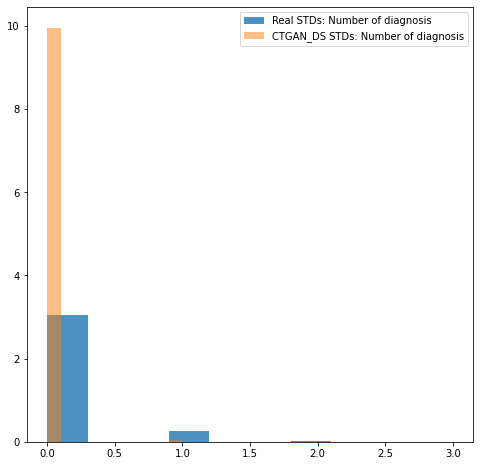

In [26]:
plt.figure(figsize=(8, 8))
plt.hist(real_age, alpha=0.8, density=True)
plt.hist(syn1_age, alpha=0.5, density=True)
plt.legend(labels=('Real STDs: Number of diagnosis', 'CTGAN_DS STDs: Number of diagnosis'))
plt.show()

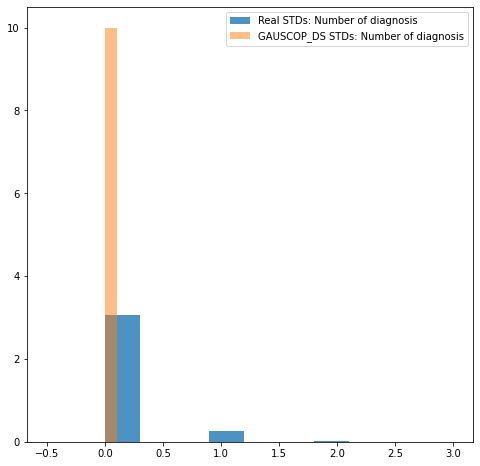

In [27]:
plt.figure(figsize=(8, 8))
plt.hist(real_age, alpha=0.8, density=True)
plt.hist(syn2_age, alpha=0.5, density=True)
plt.legend(labels=('Real STDs: Number of diagnosis', 'GAUSCOP_DS STDs: Number of diagnosis'))
plt.show()

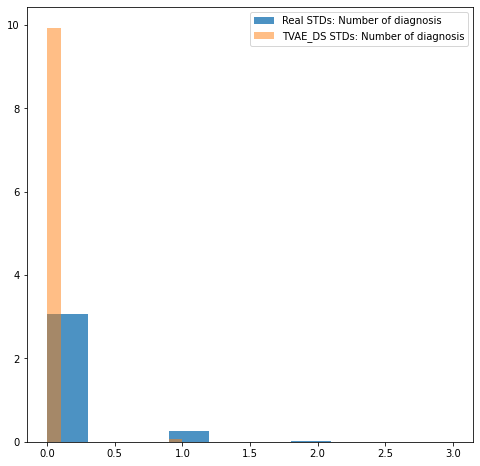

In [28]:
plt.figure(figsize=(8, 8))
plt.hist(real_age, alpha=0.8, density=True)
plt.hist(syn3_age, alpha=0.5, density=True)
plt.legend(labels=('Real STDs: Number of diagnosis', 'TVAE_DS STDs: Number of diagnosis'))
plt.show()

## Dataset Portions Graphs

#### Real STDs: Number of diagnosis vs. CTGAN_DS STDs: Number of diagnosis (portions of 100) — 50 graphs

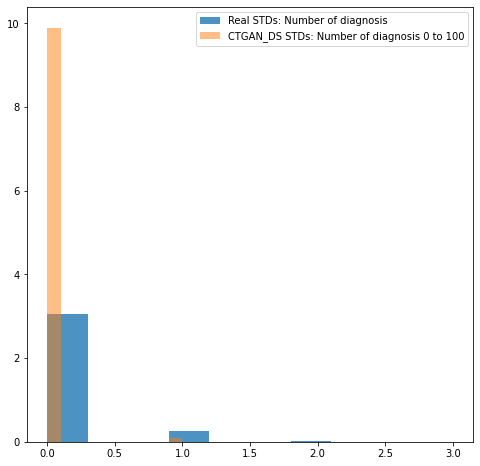

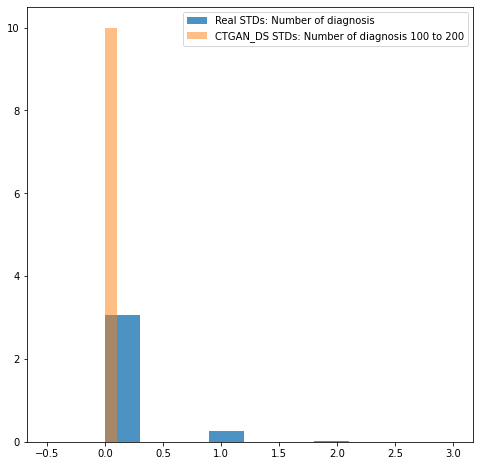

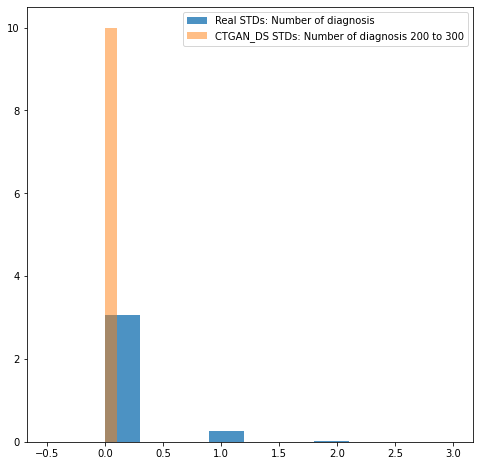

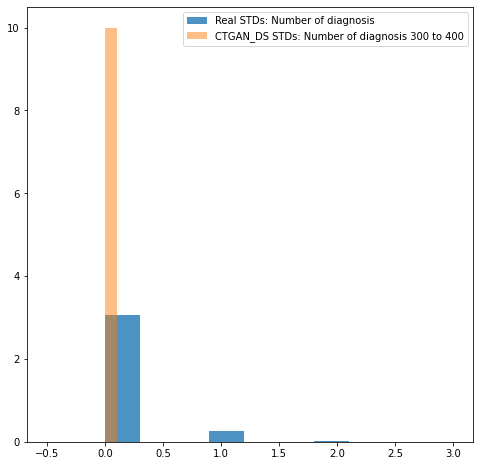

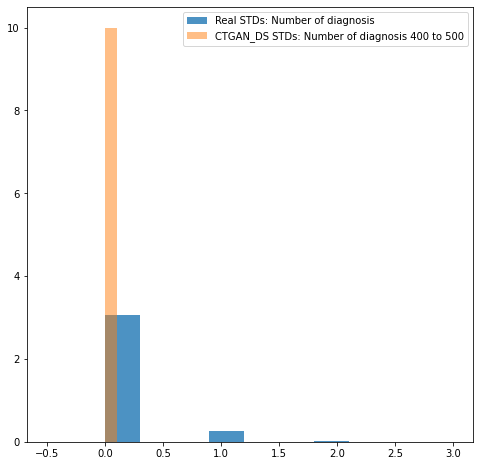

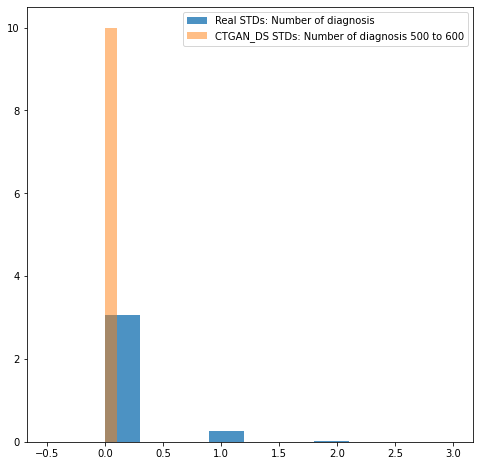

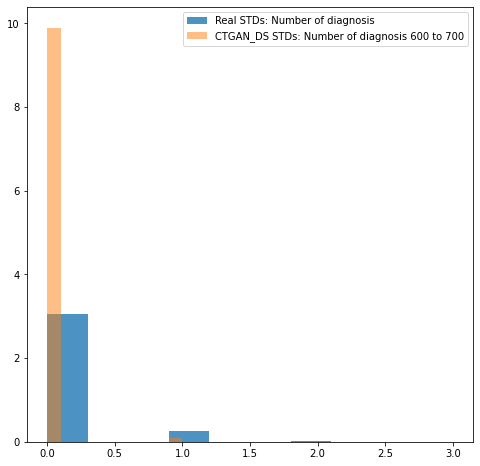

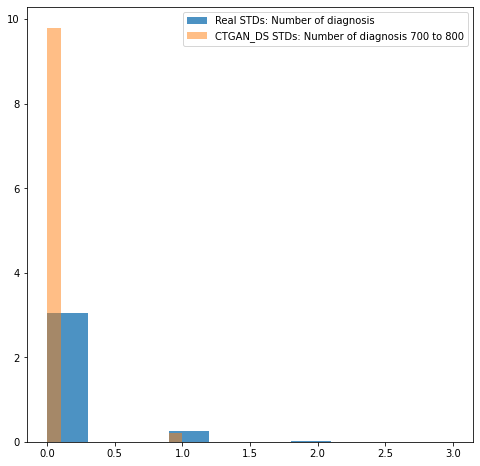

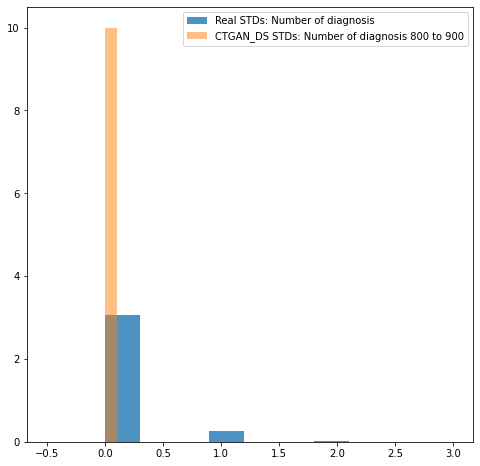

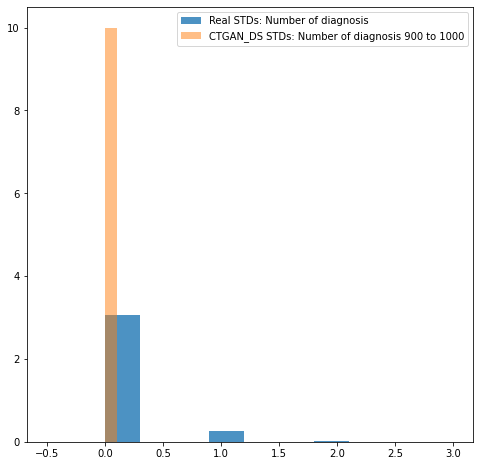

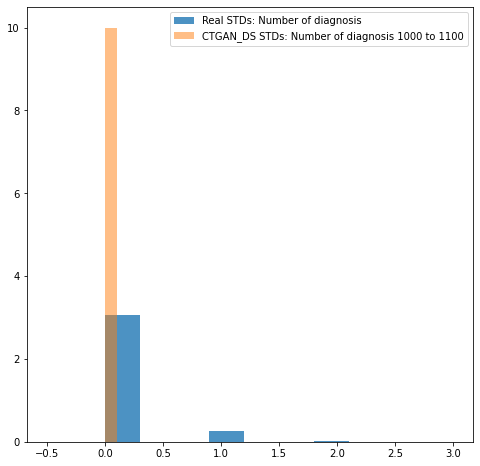

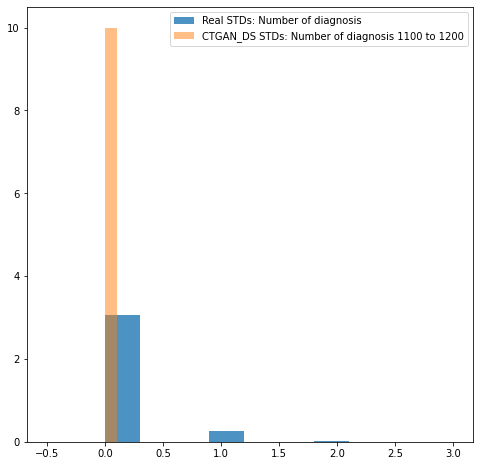

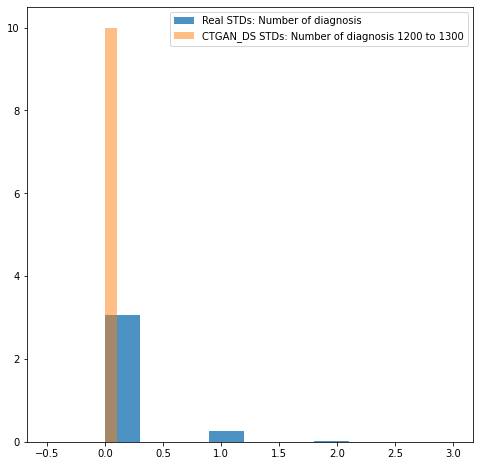

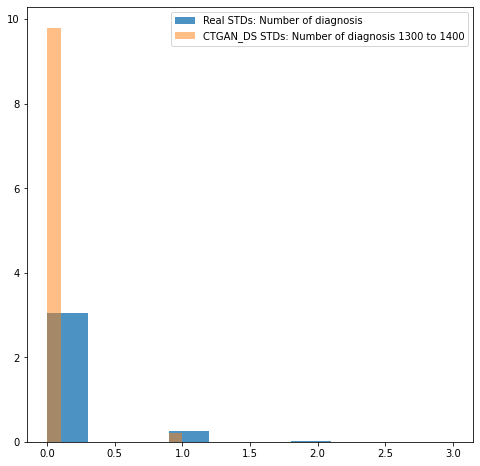

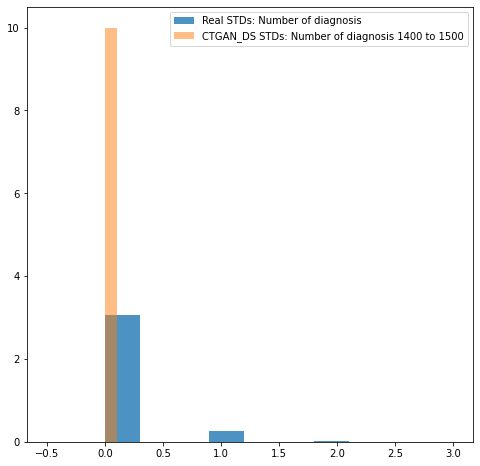

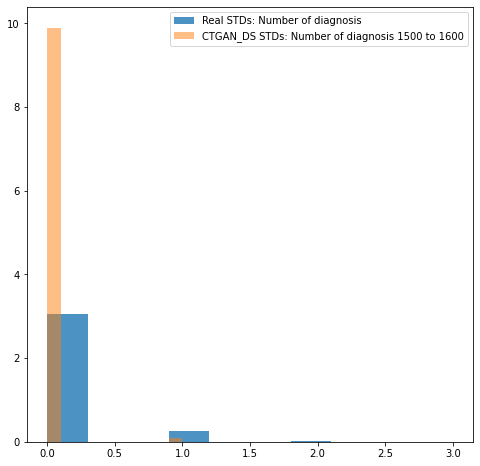

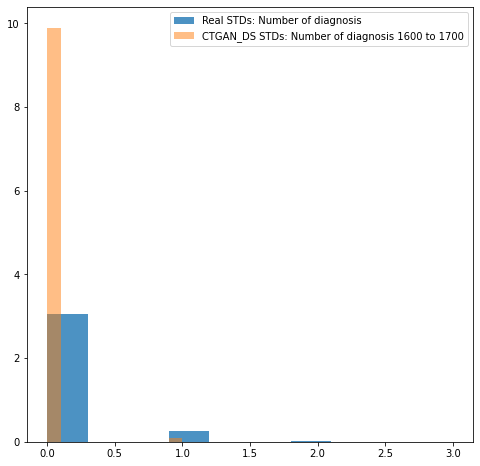

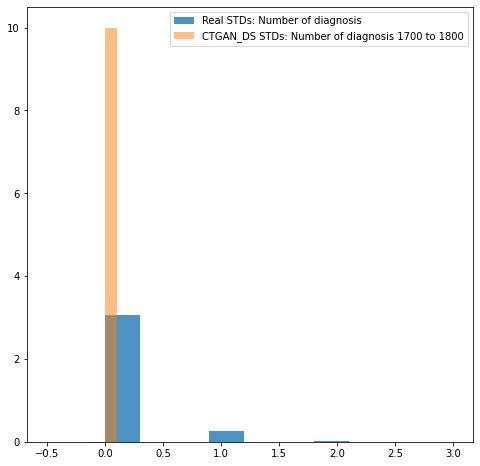

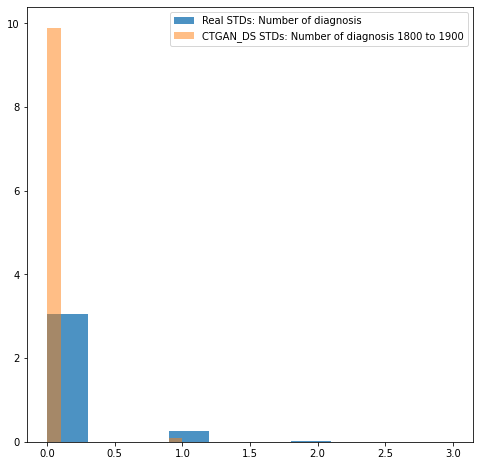

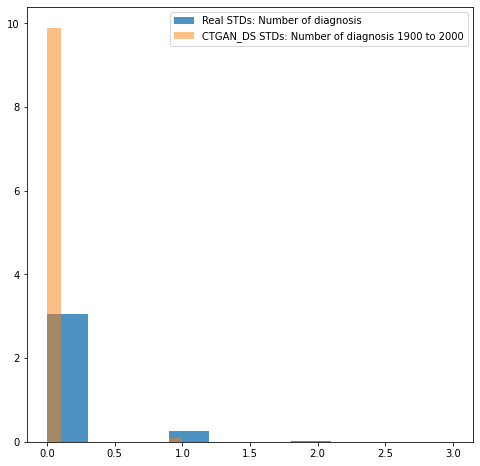

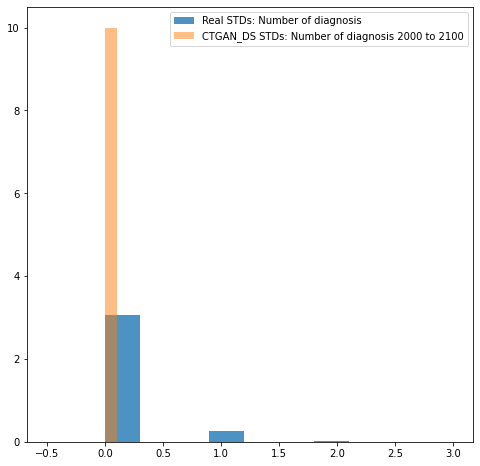

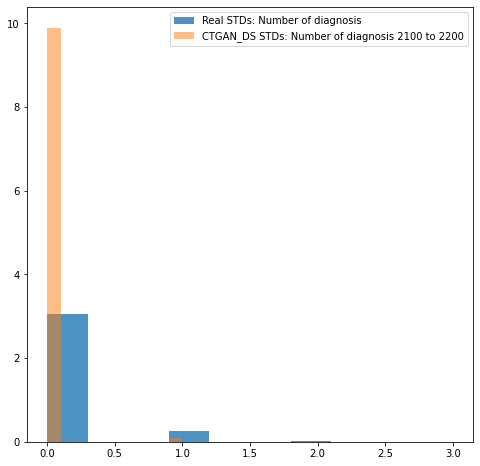

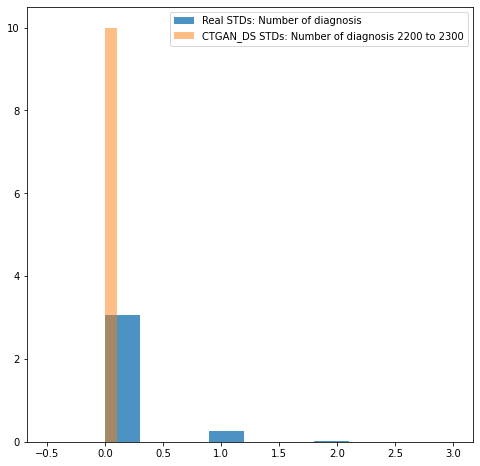

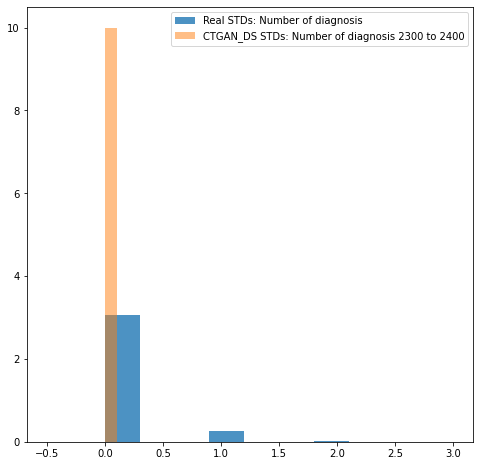

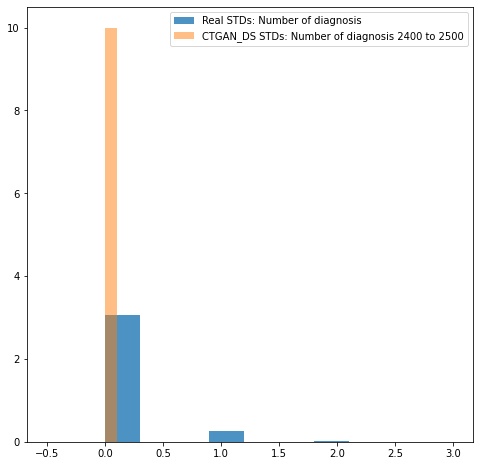

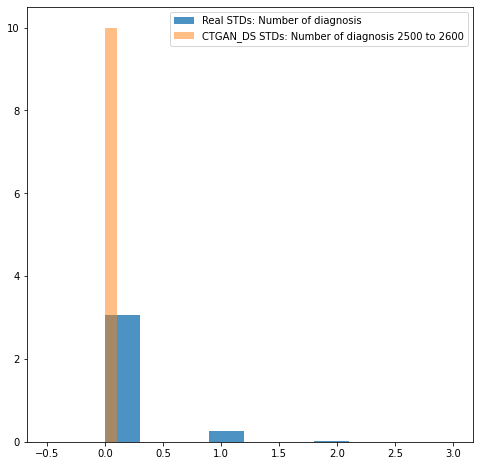

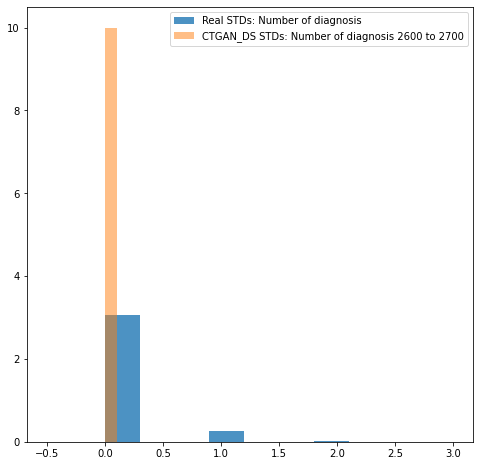

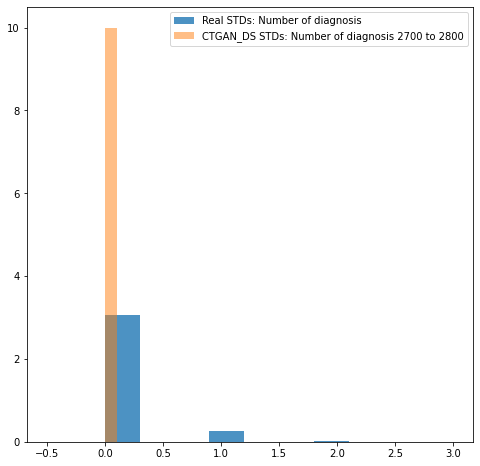

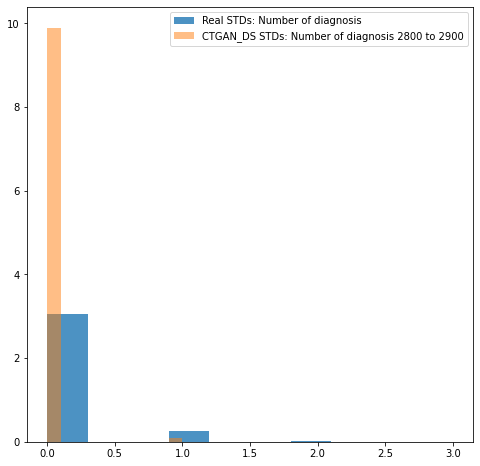

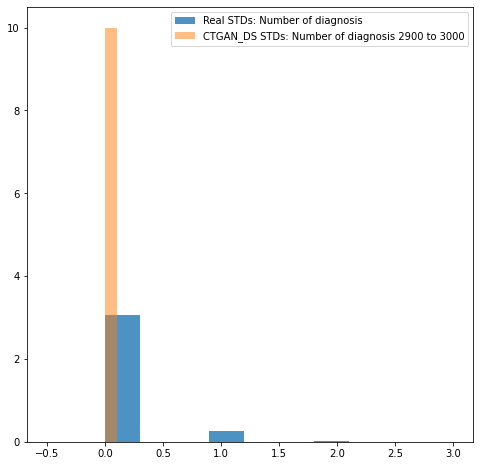

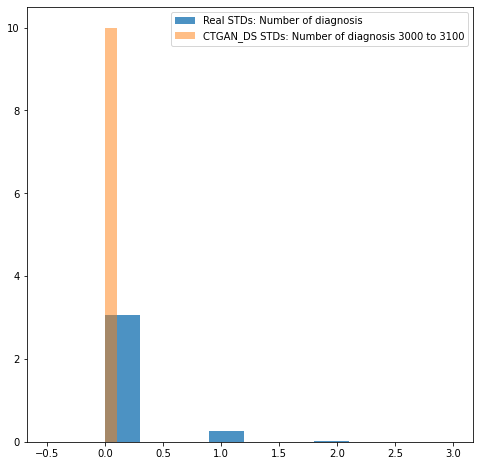

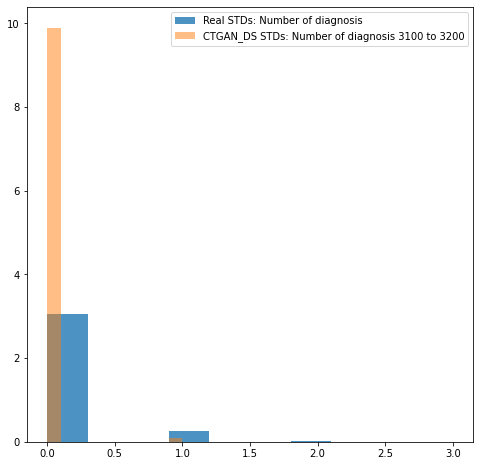

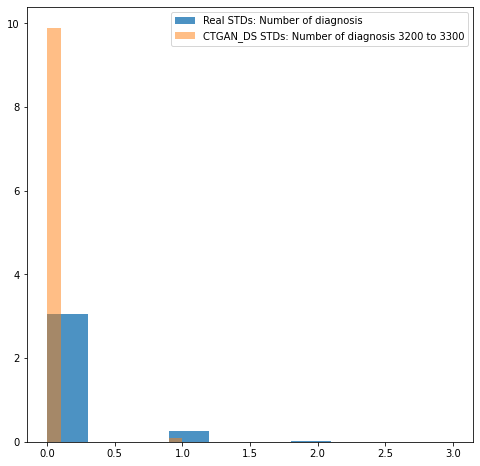

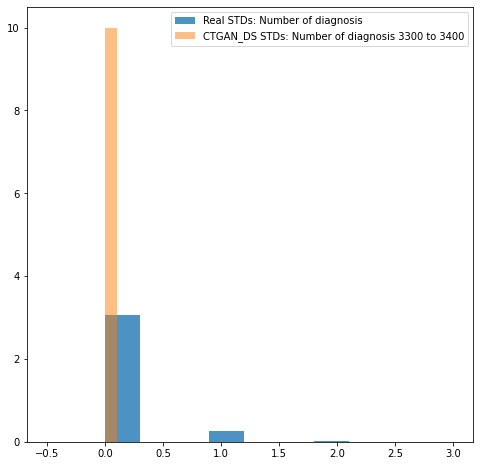

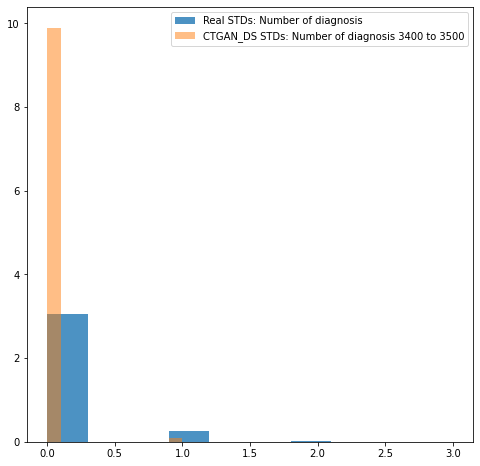

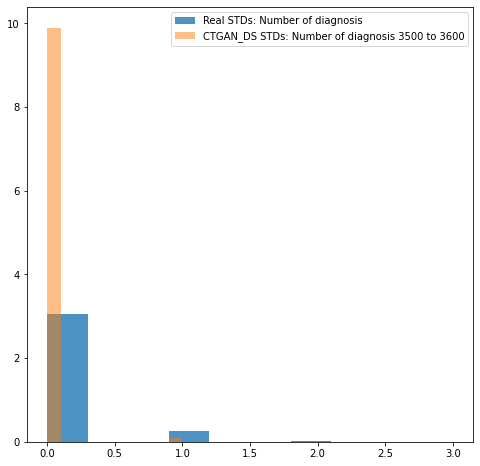

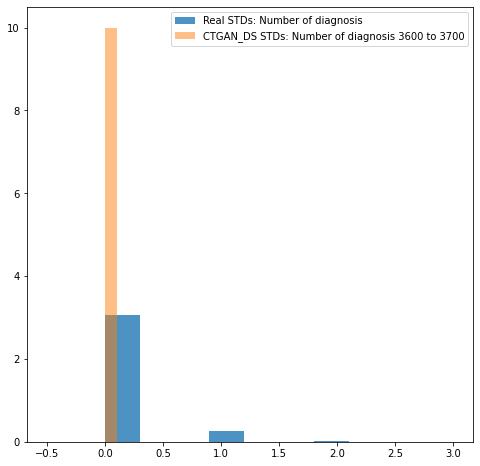

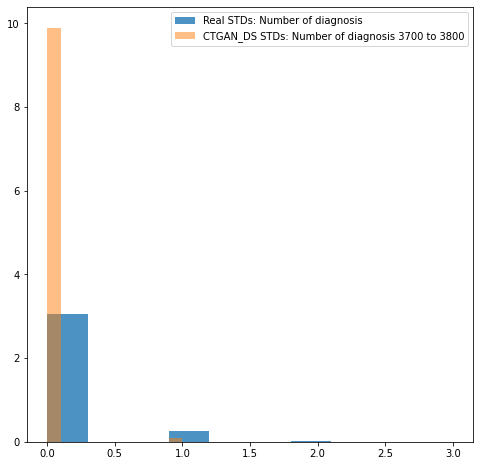

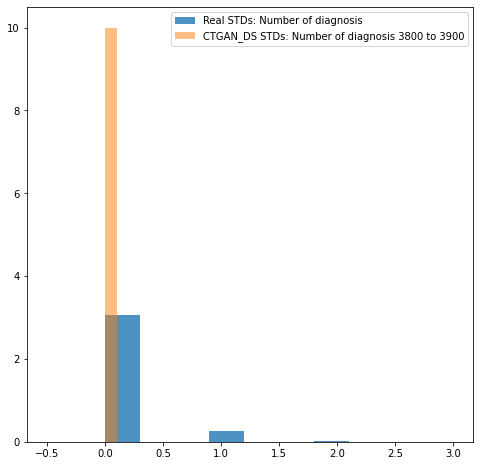

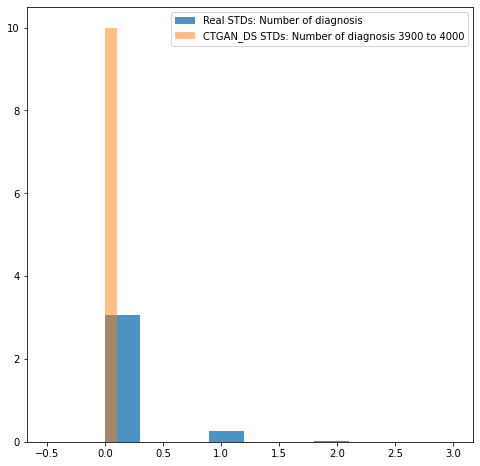

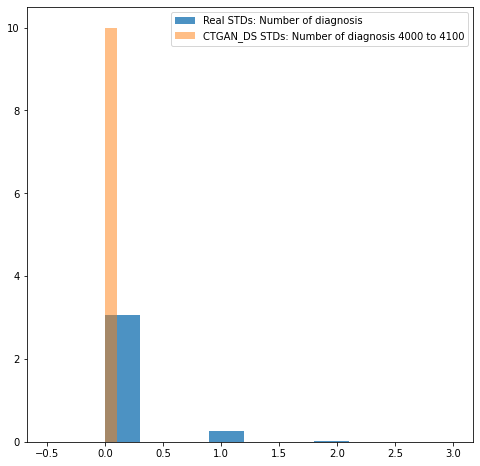

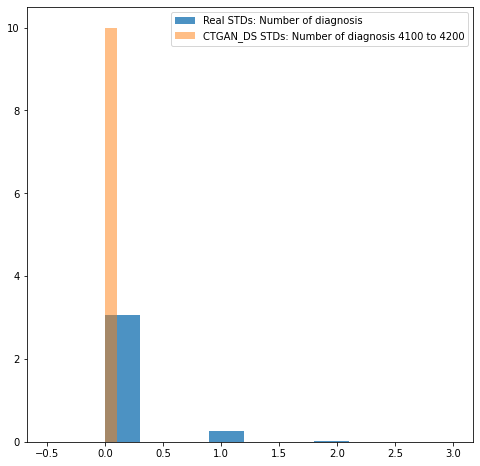

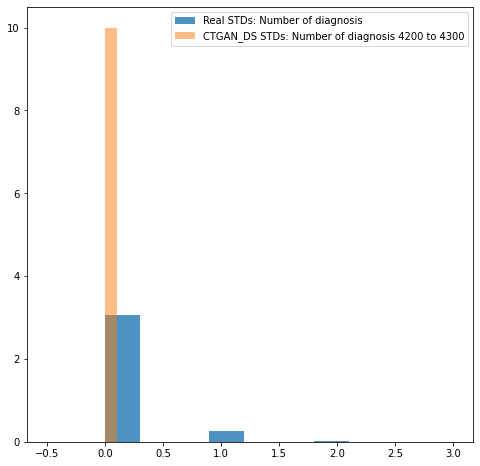

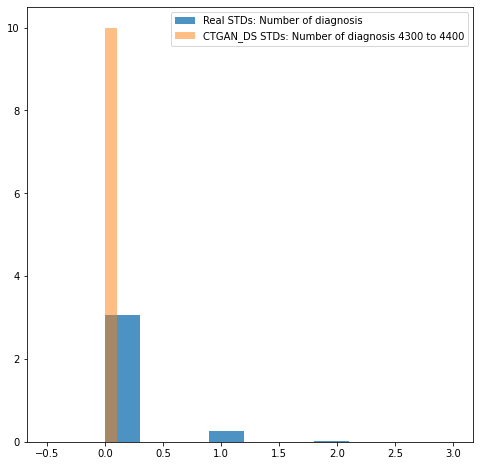

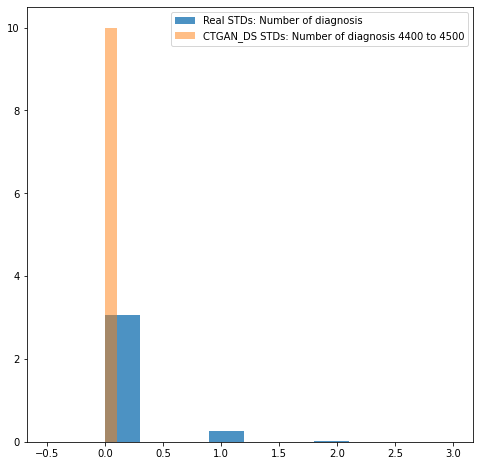

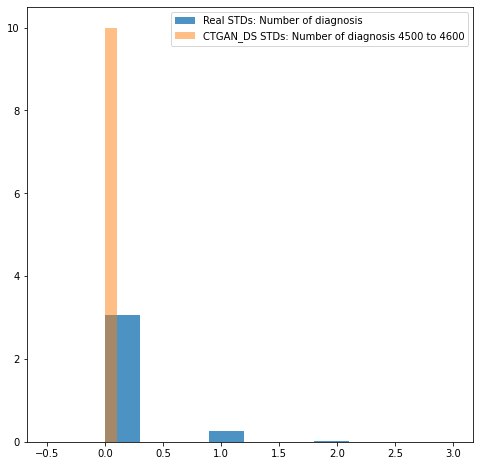

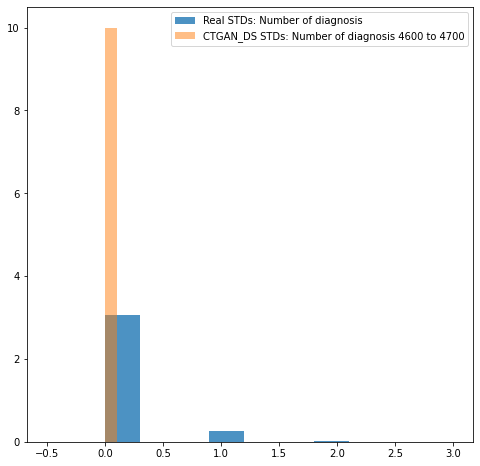

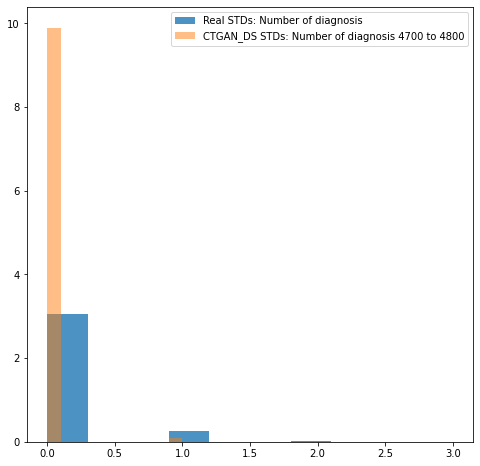

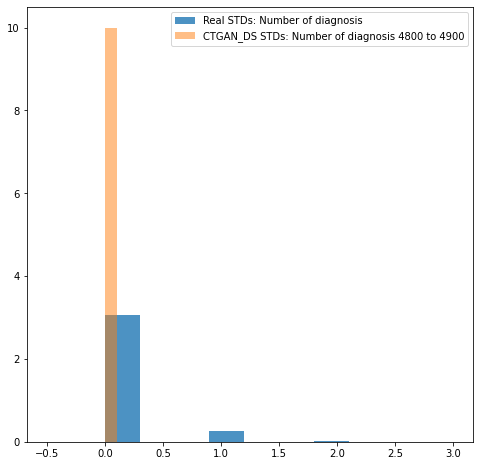

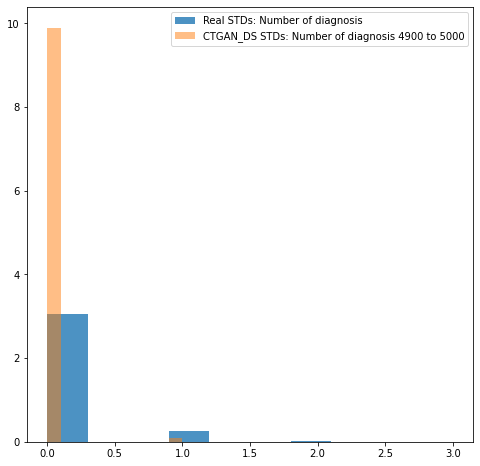

In [29]:
for i in range(0, len(syn1_age), 100):
    plt.figure(figsize=(8, 8))
    plt.hist(real_age, alpha=0.8, density=True)
    plt.hist(syn1_age[i:i+100], alpha=0.5, density=True)
    plt.legend(labels=('Real STDs: Number of diagnosis', f'CTGAN_DS STDs: Number of diagnosis {i} to {i+100}'))
    plt.show()

#### Real STDs: Number of diagnosis vs. GAUSCOP_DS STDs: Number of diagnosis (portions of 100) — 50 graphs

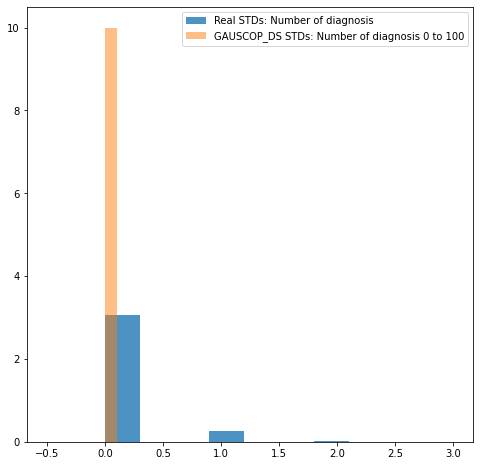

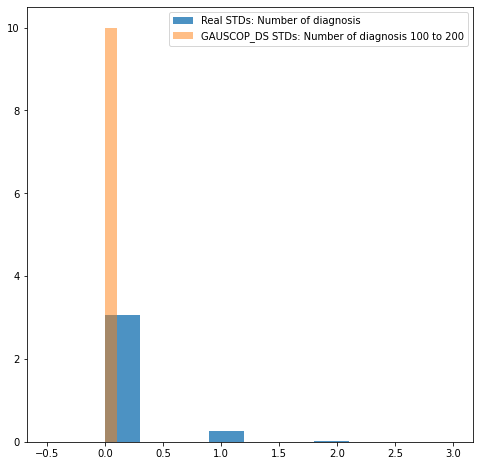

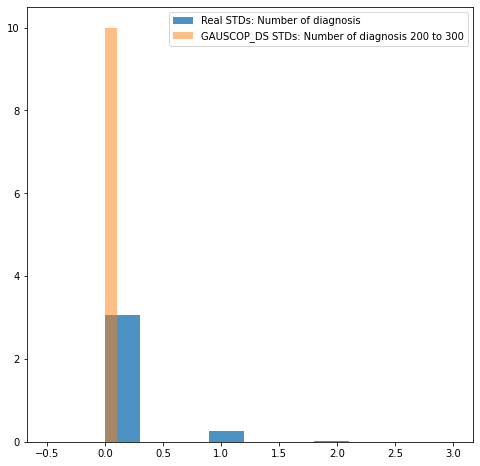

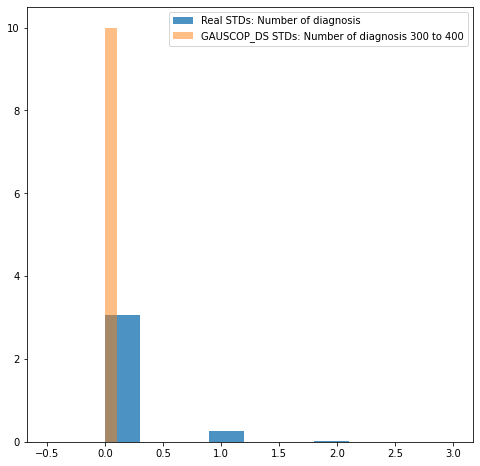

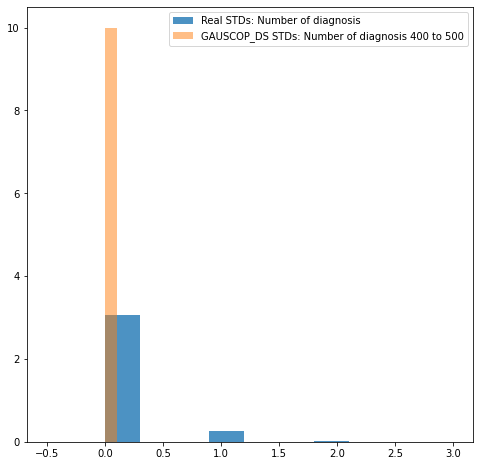

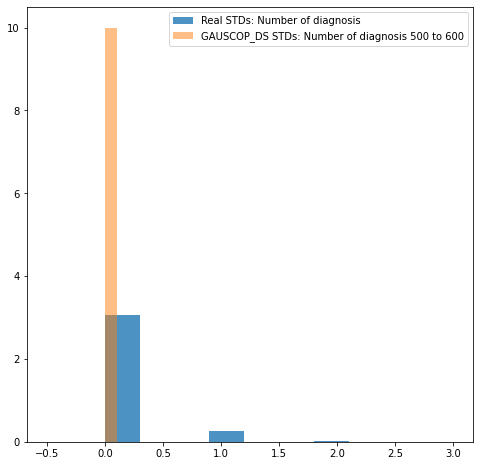

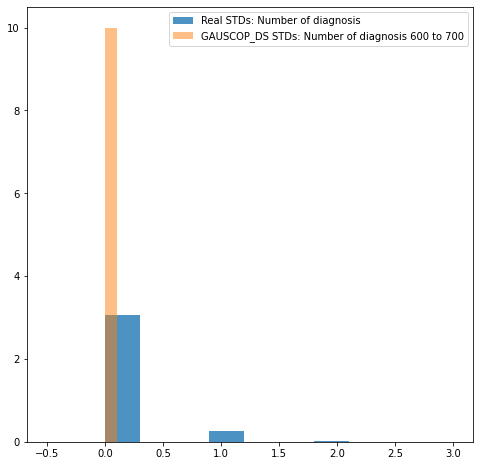

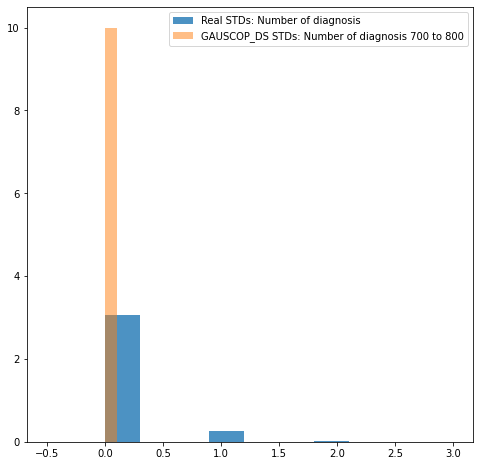

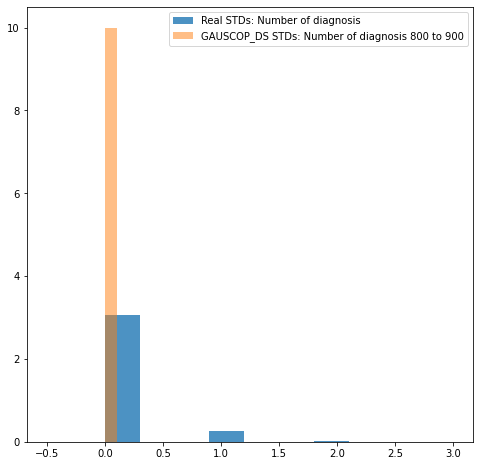

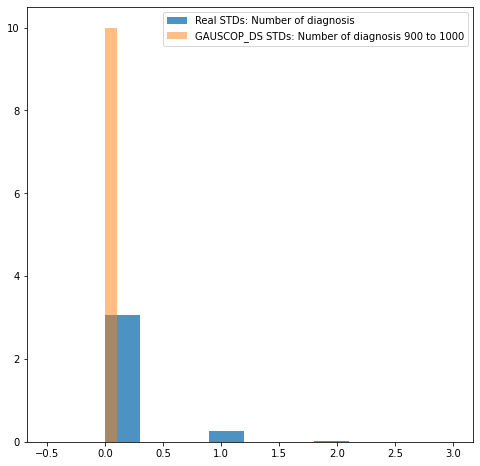

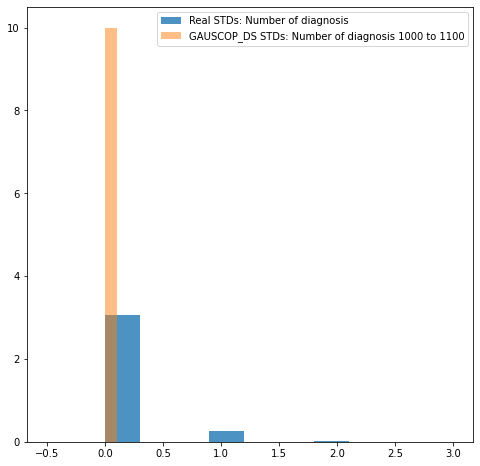

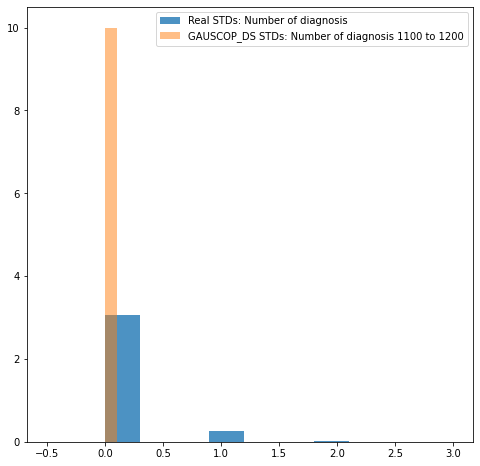

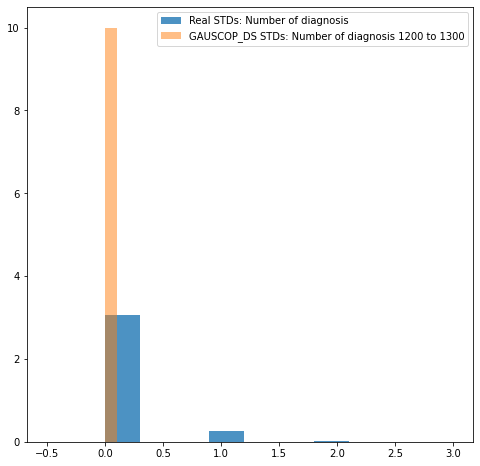

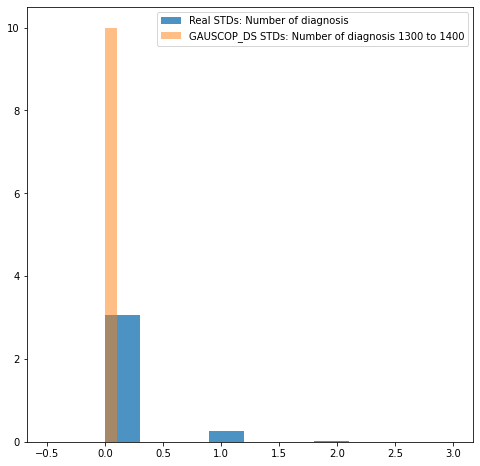

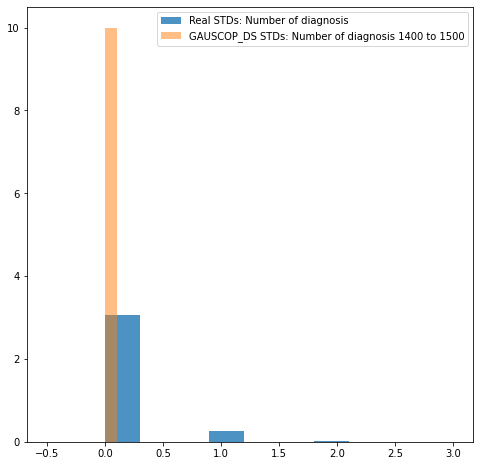

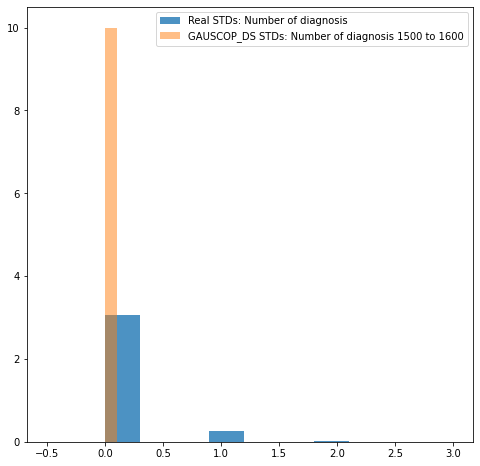

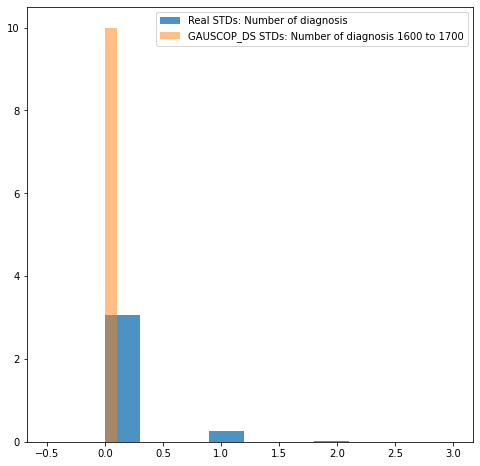

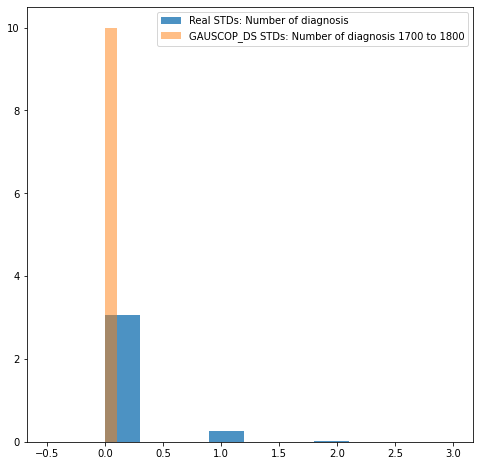

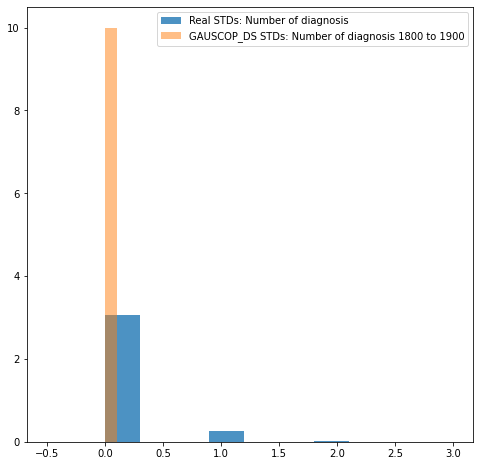

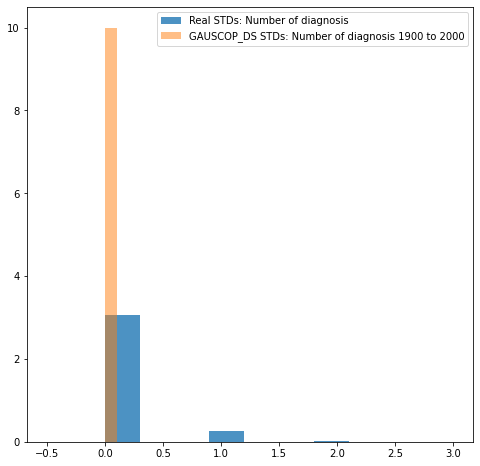

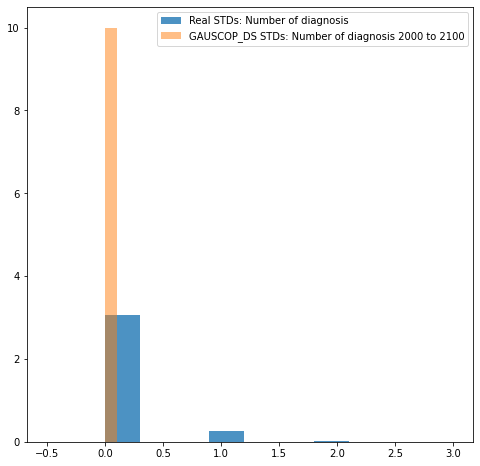

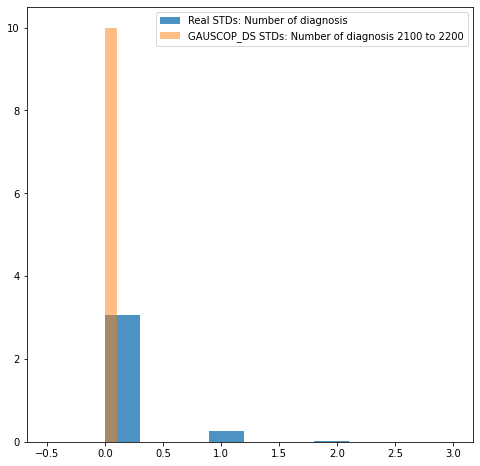

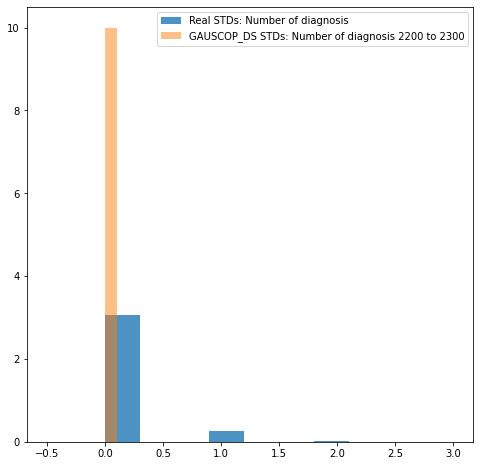

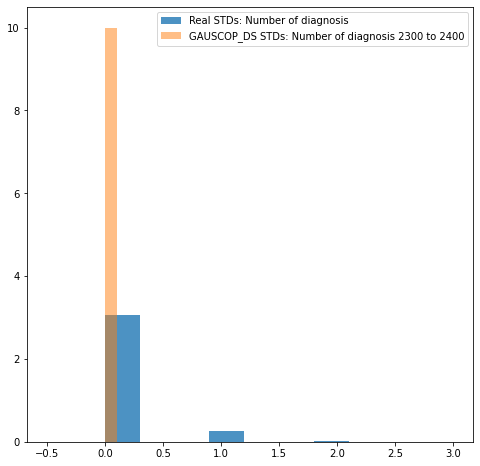

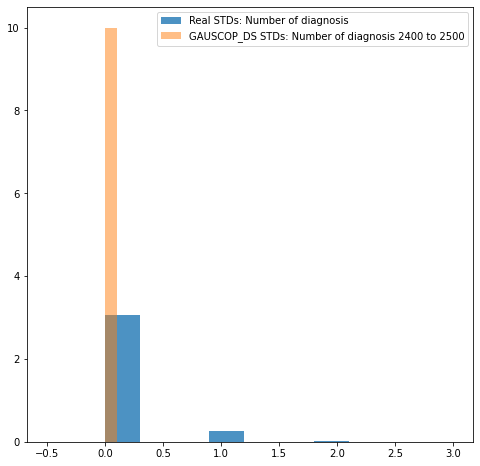

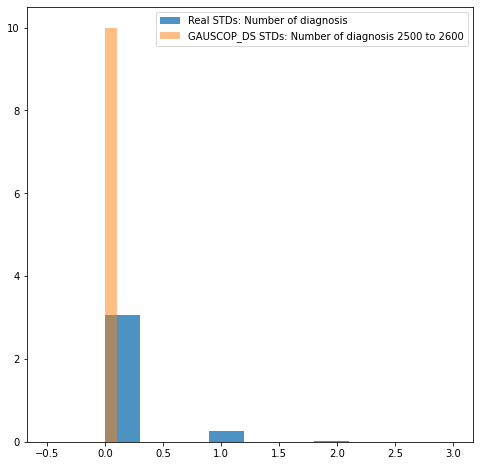

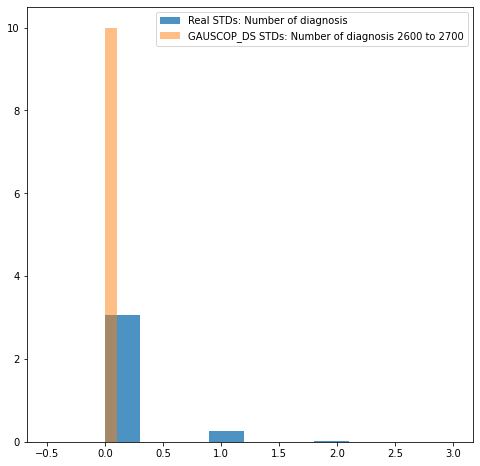

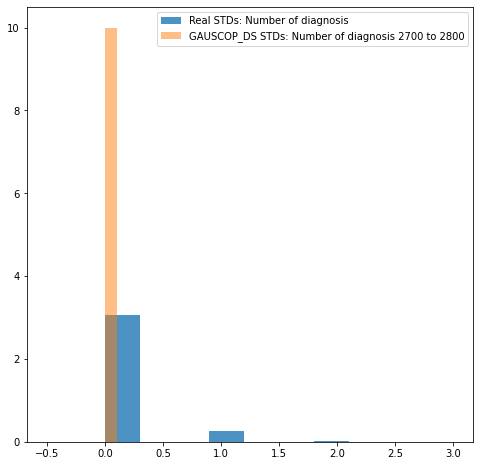

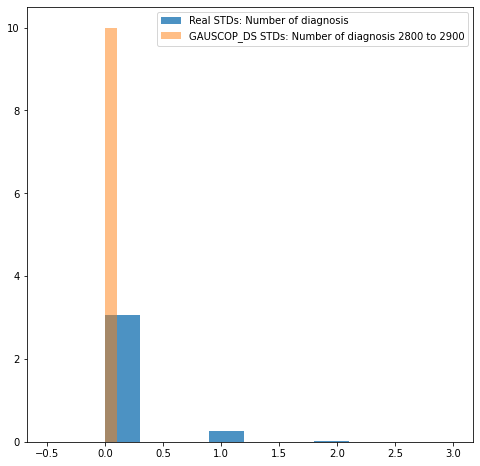

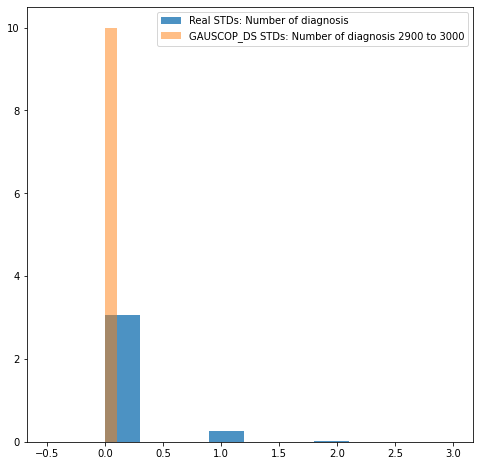

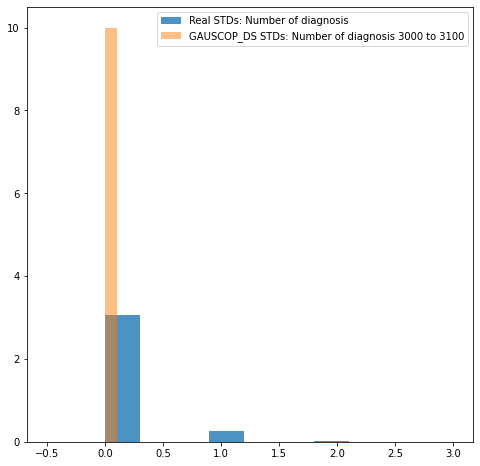

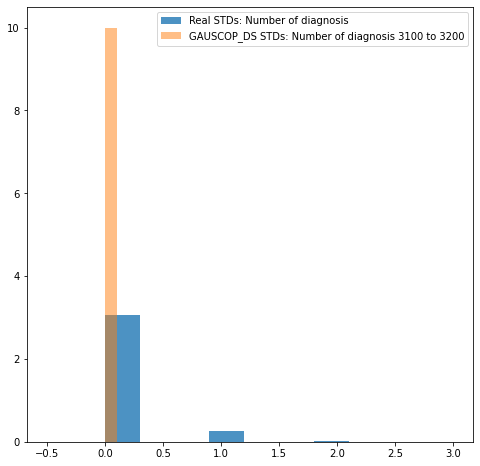

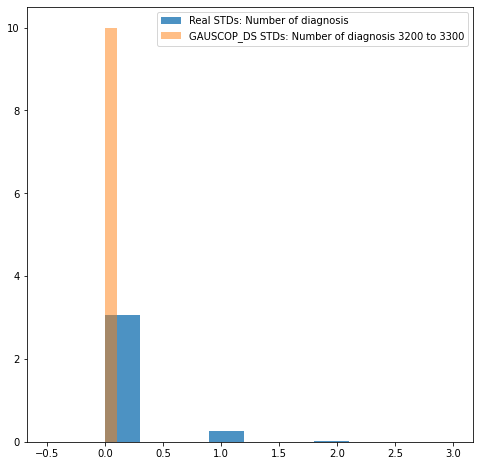

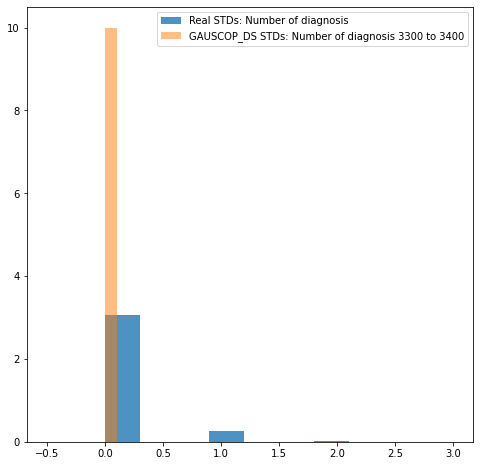

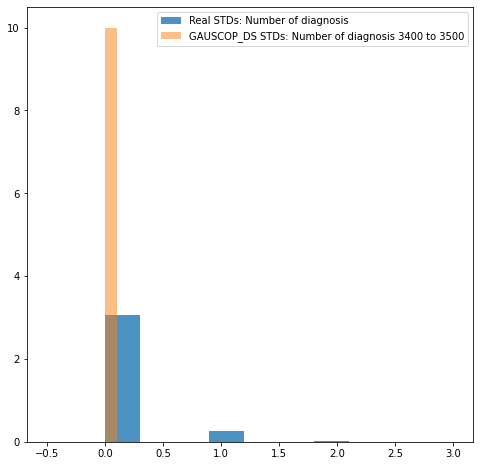

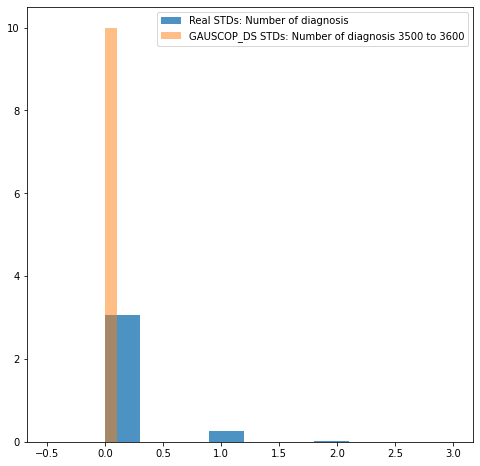

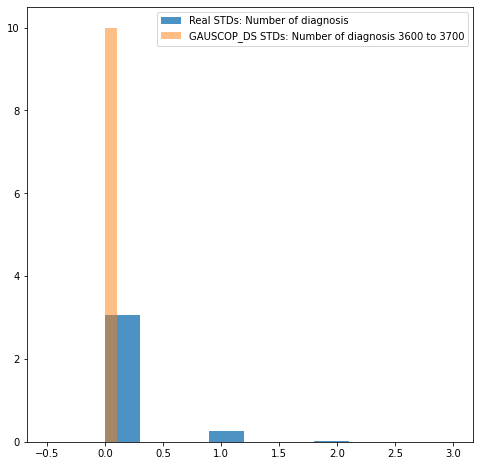

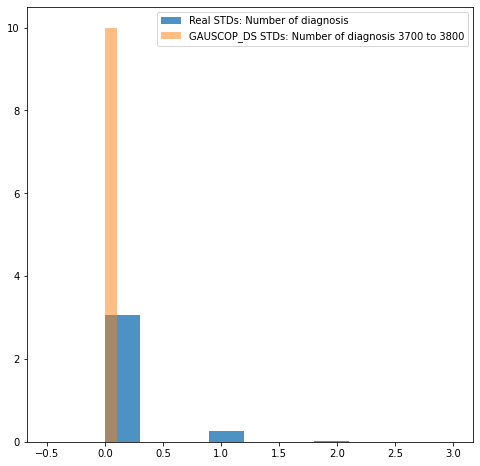

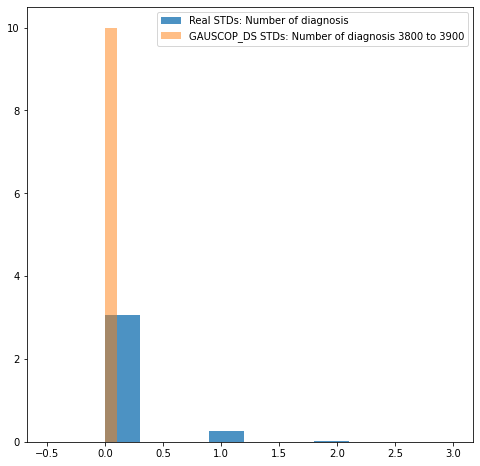

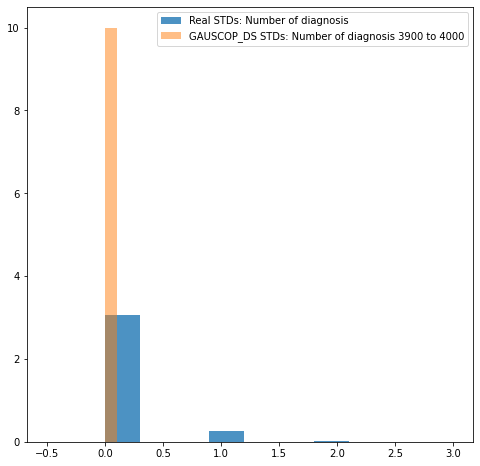

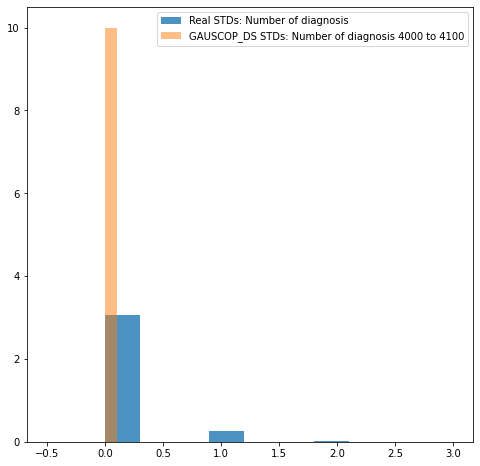

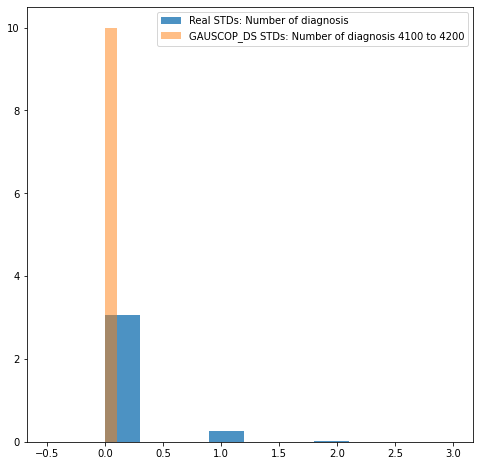

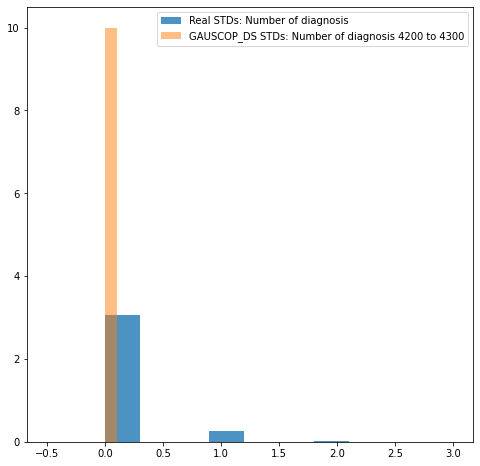

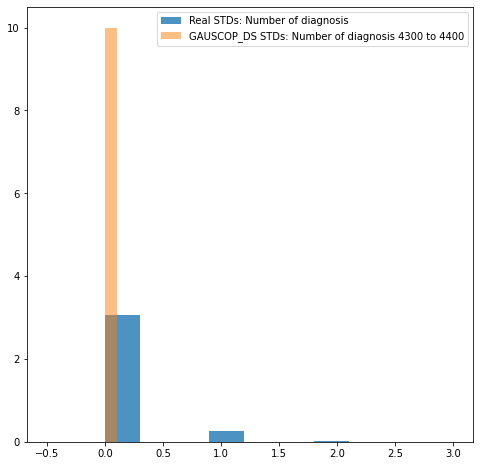

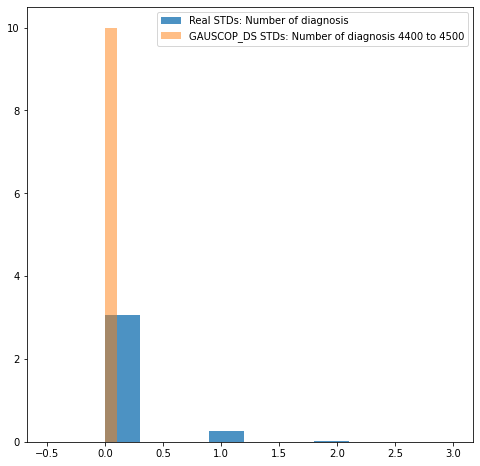

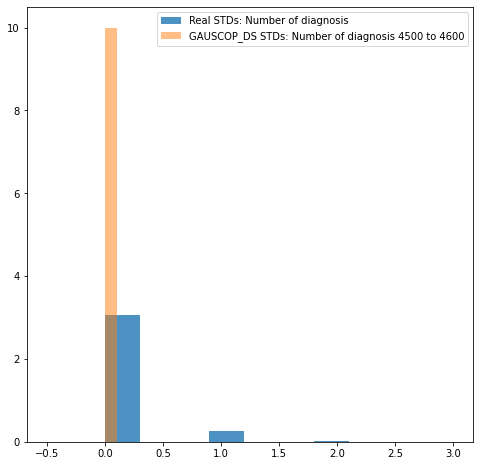

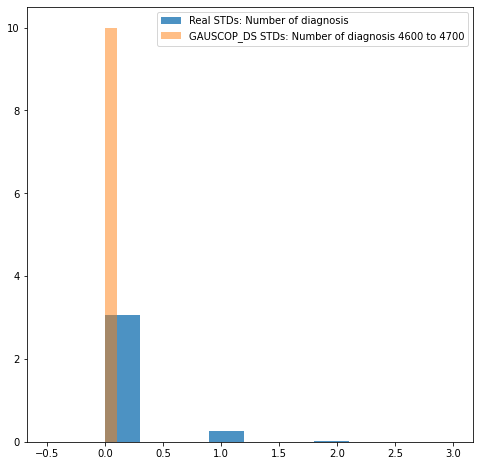

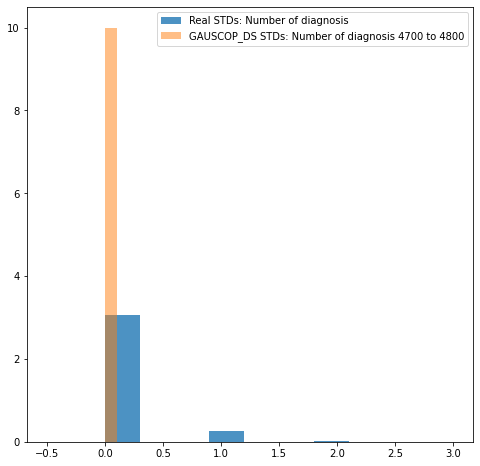

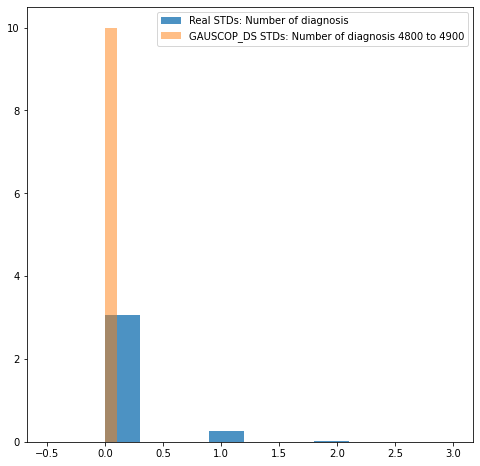

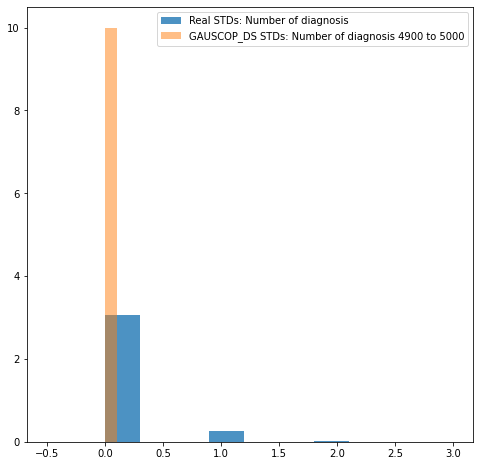

In [30]:
for i in range(0, len(syn2_age), 100):
    plt.figure(figsize=(8, 8))
    plt.hist(real_age, alpha=0.8, density=True)
    plt.hist(syn2_age[i:i+100], alpha=0.5, density=True)
    plt.legend(labels=('Real STDs: Number of diagnosis', f'GAUSCOP_DS STDs: Number of diagnosis {i} to {i+100}'))
    plt.show()

#### Real STDs: Number of diagnosis vs. TVAE_DS STDs: Number of diagnosis (portions of 100) — 50 graphs

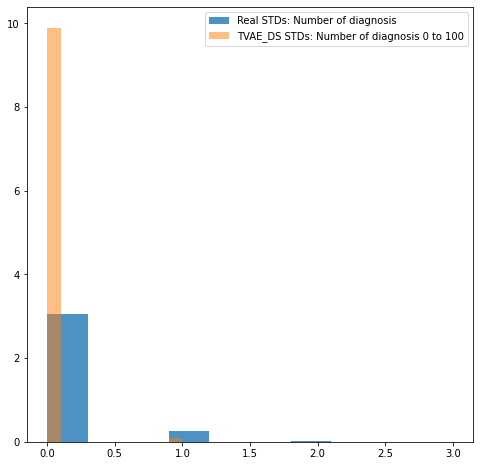

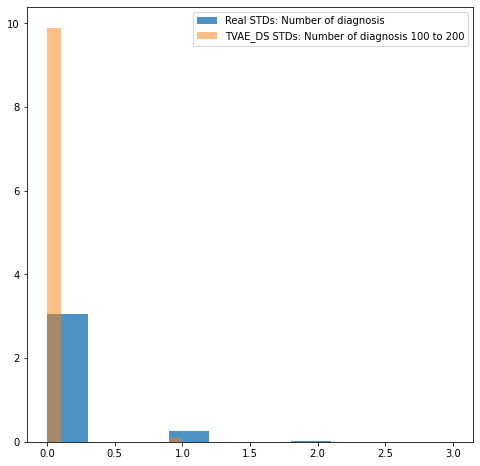

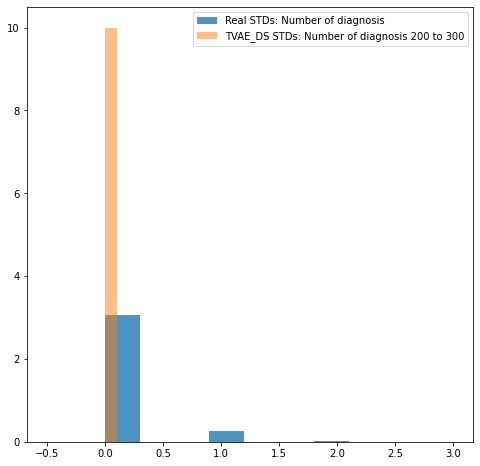

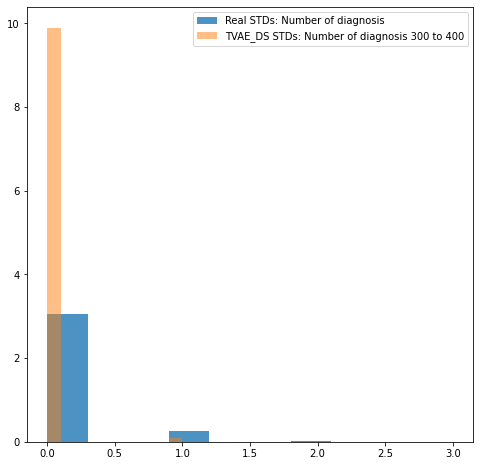

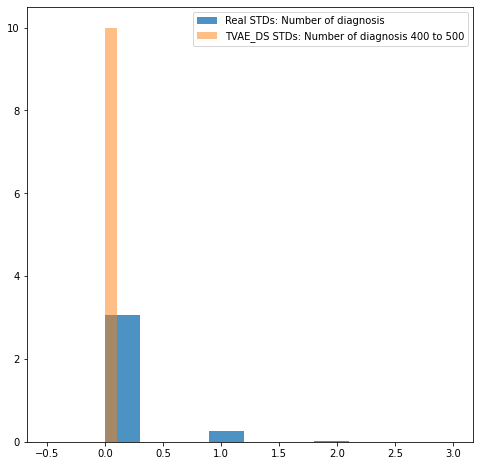

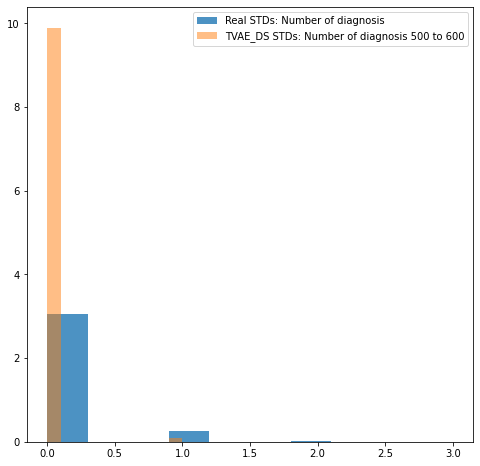

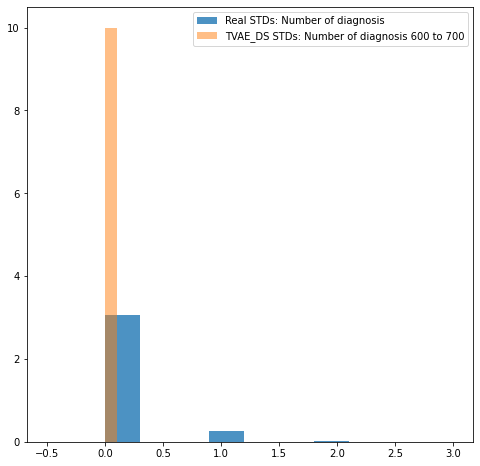

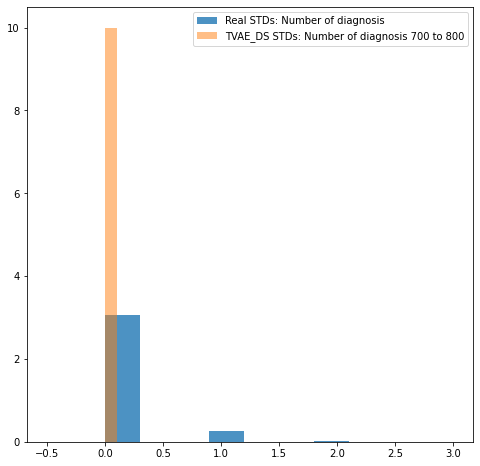

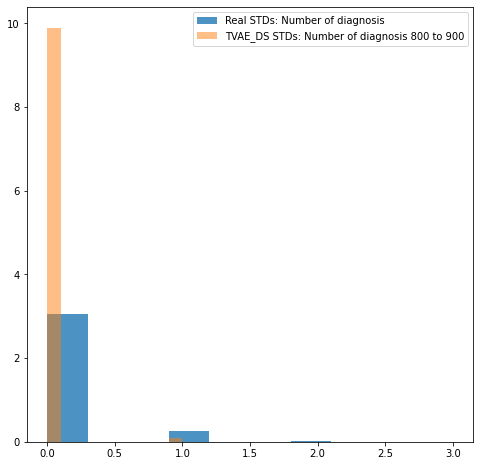

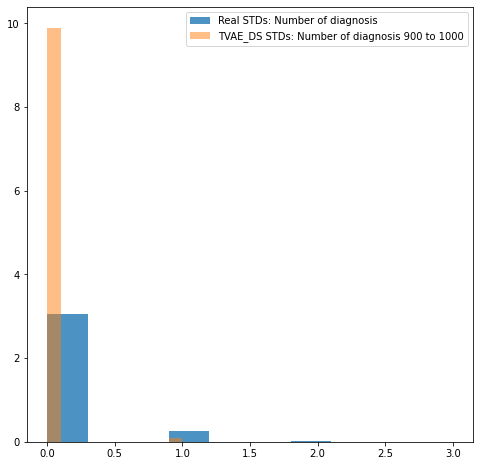

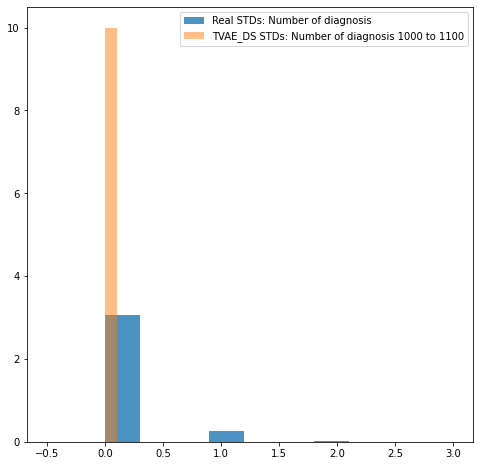

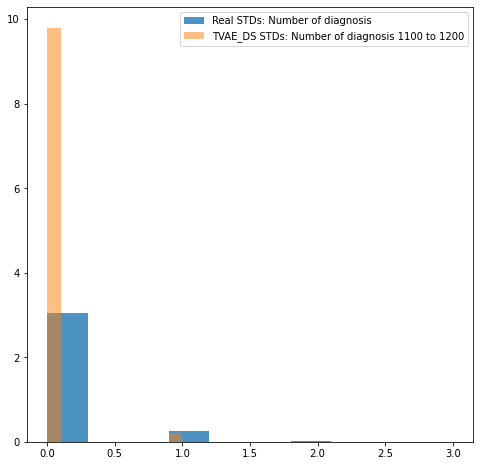

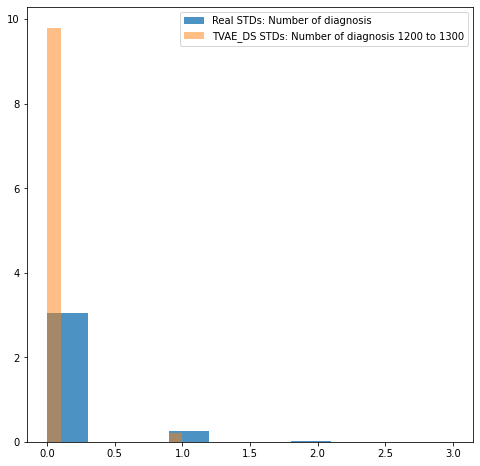

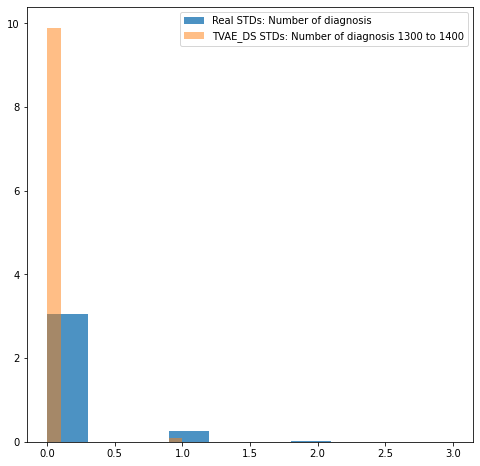

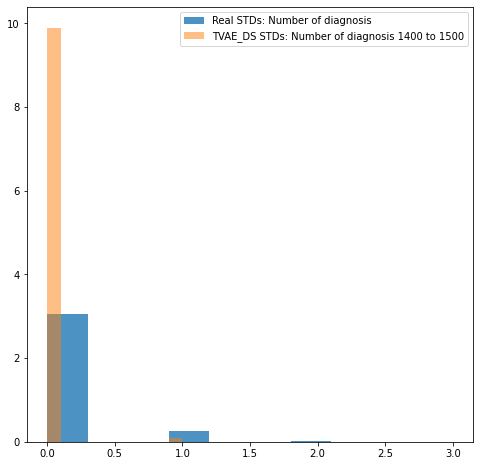

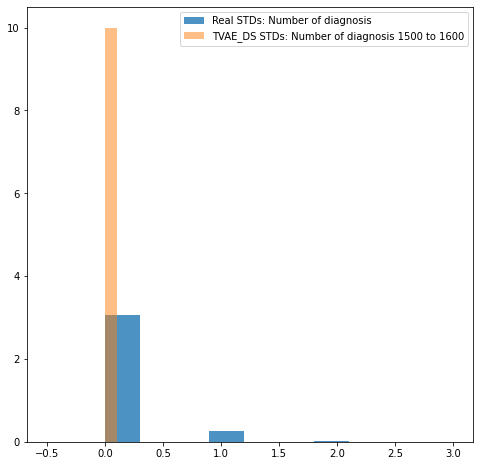

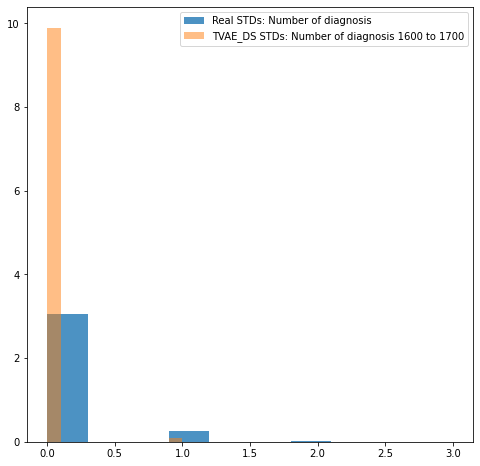

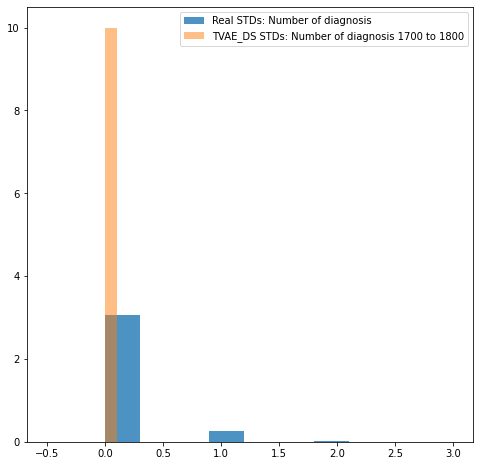

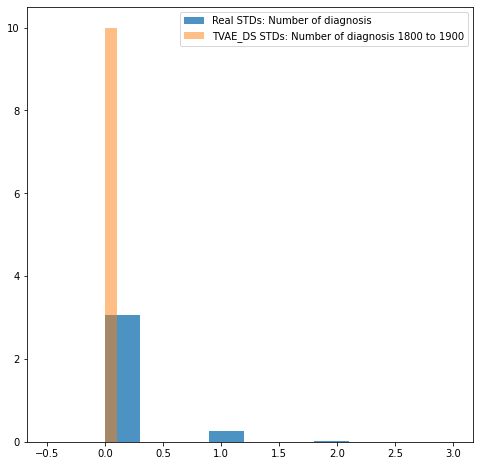

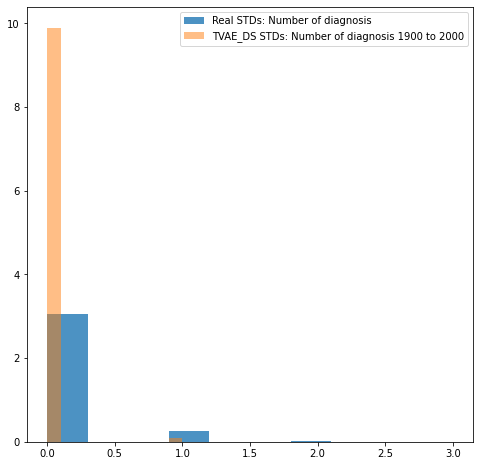

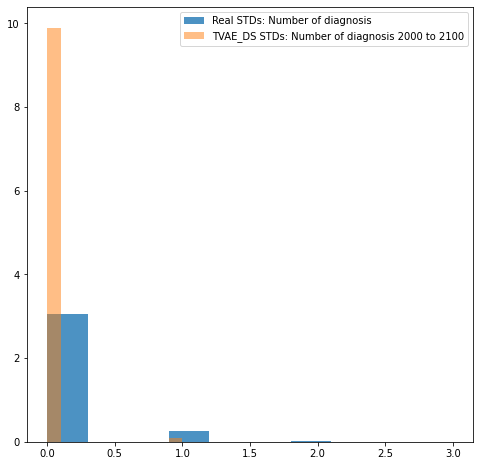

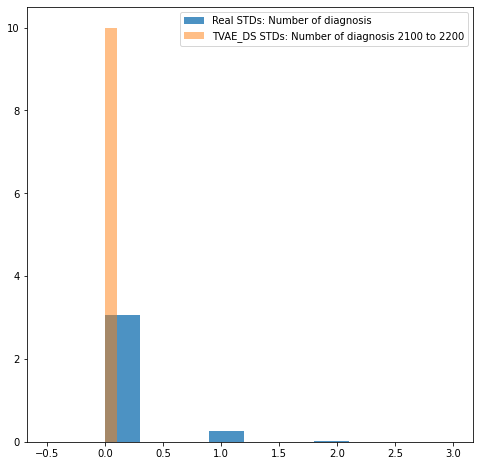

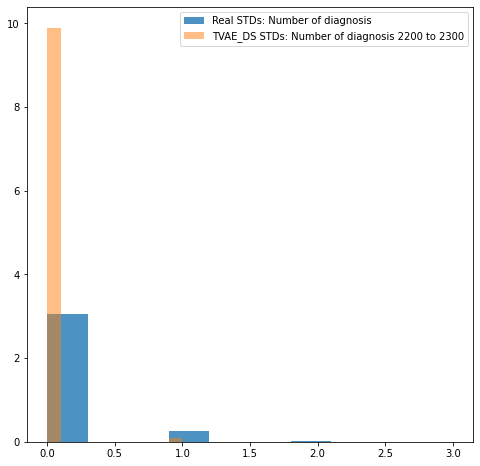

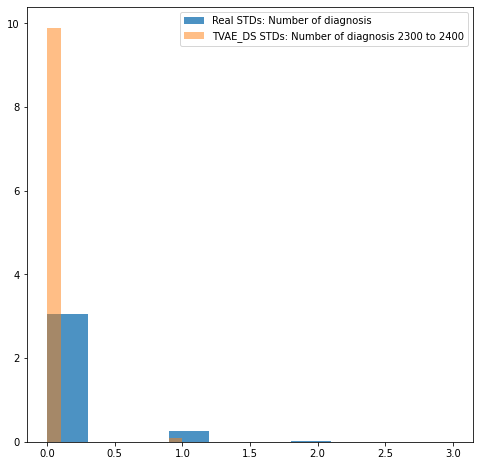

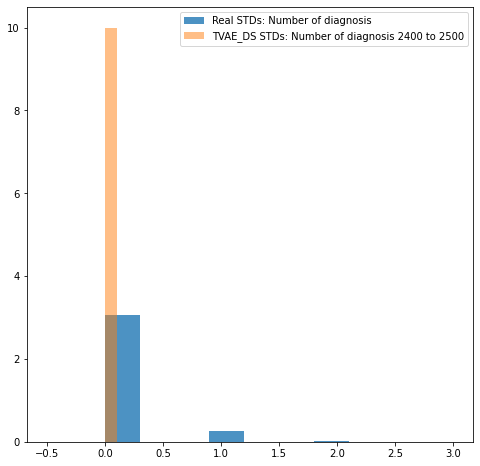

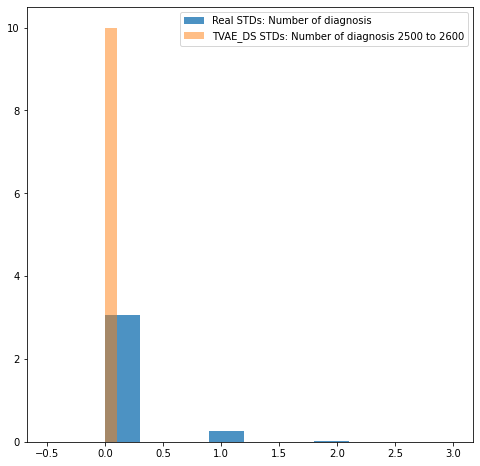

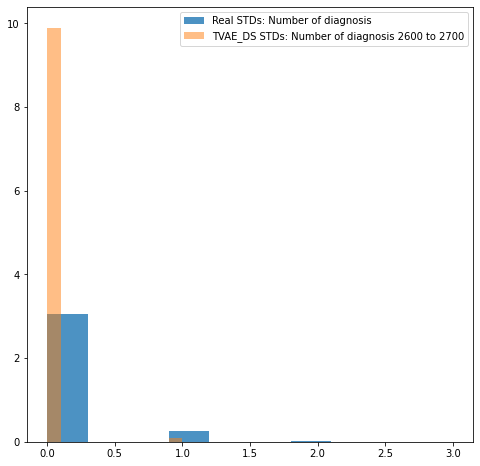

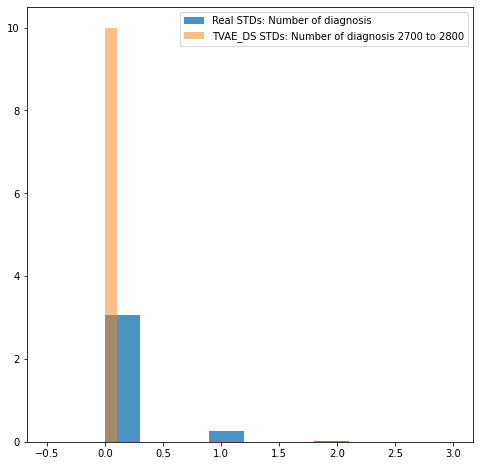

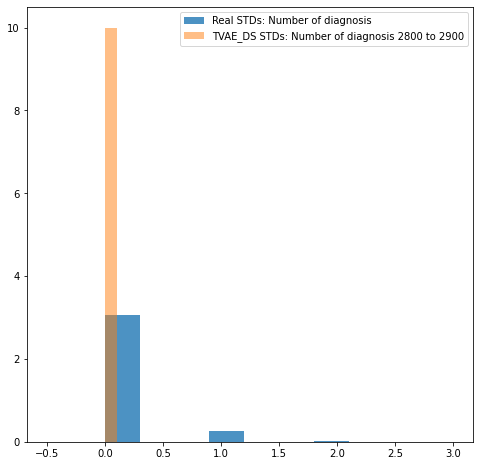

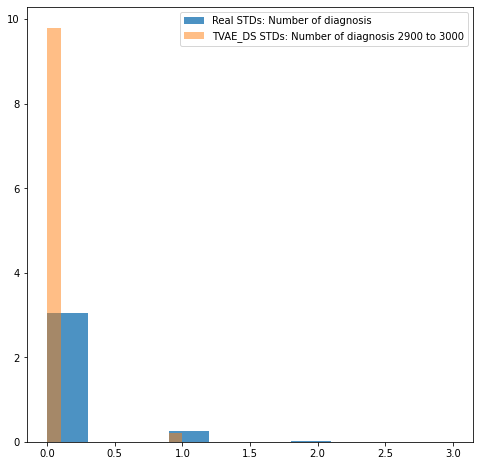

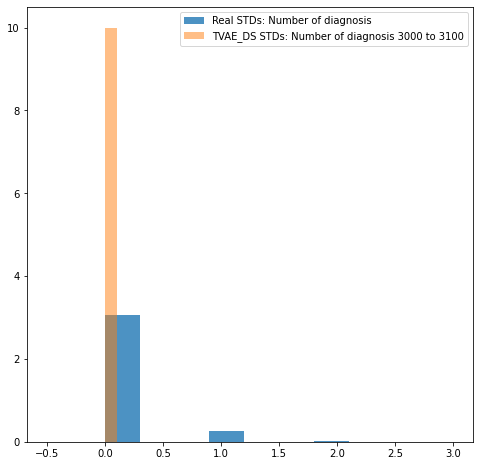

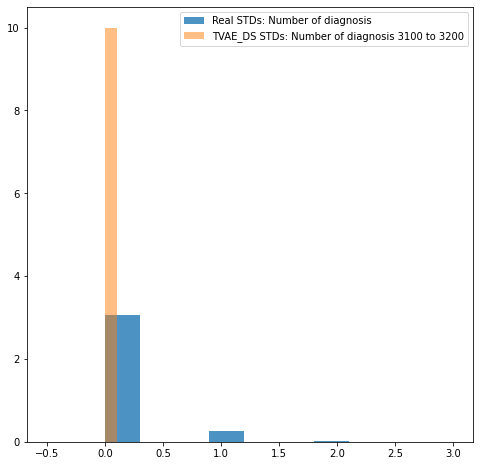

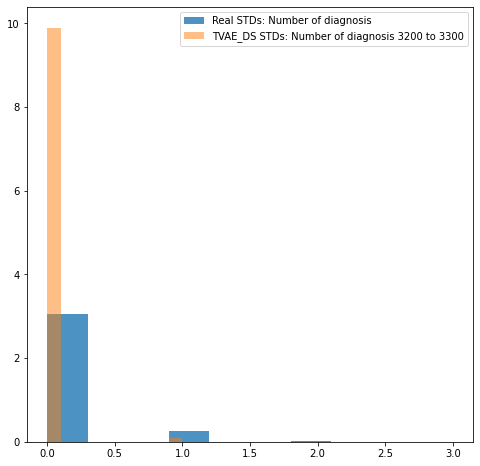

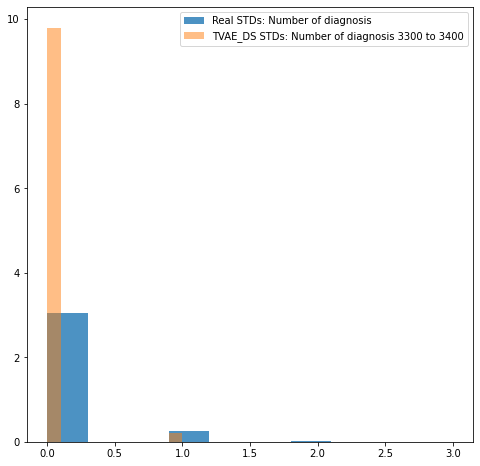

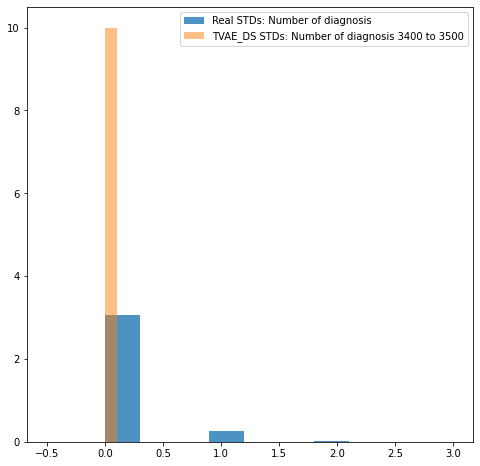

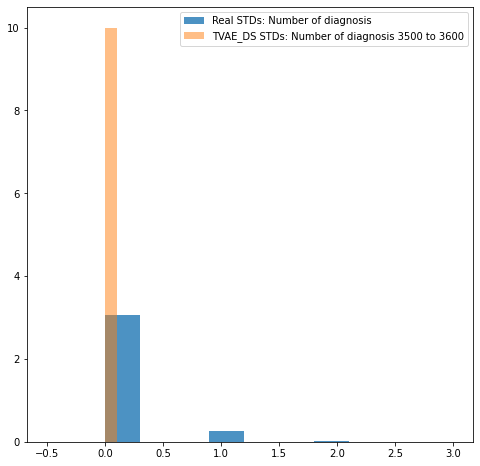

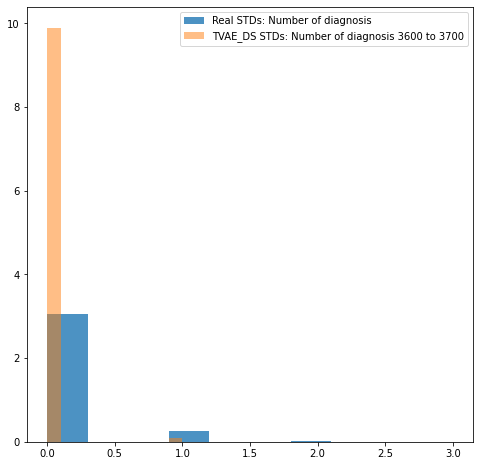

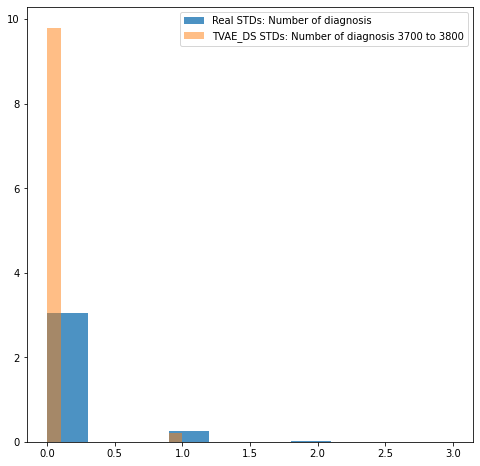

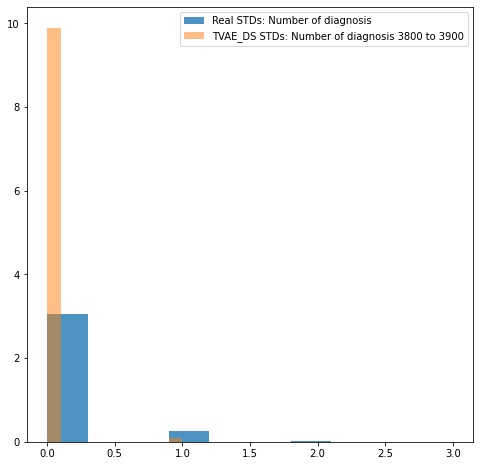

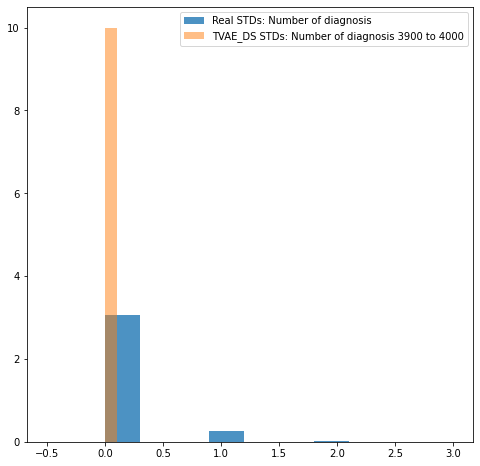

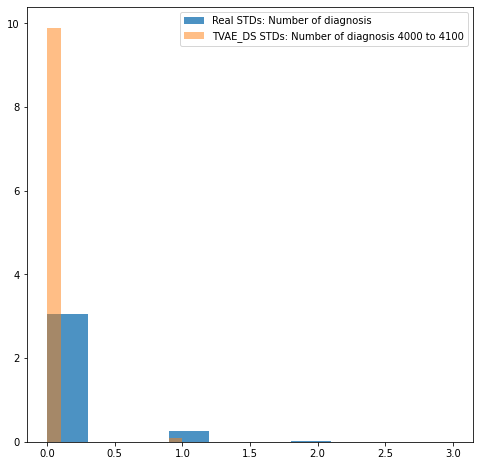

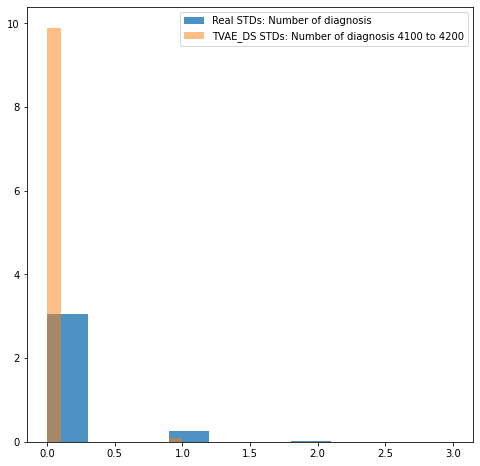

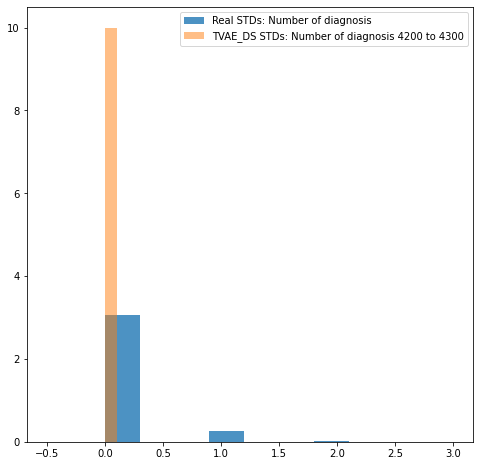

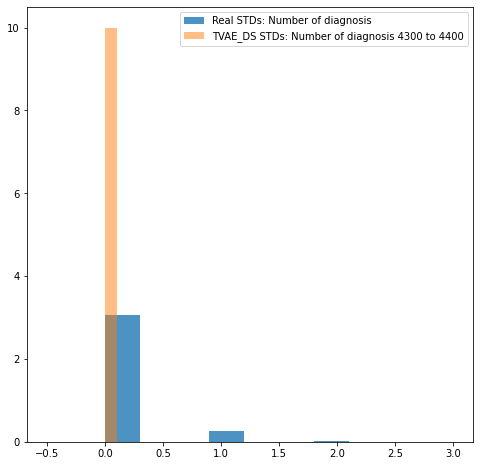

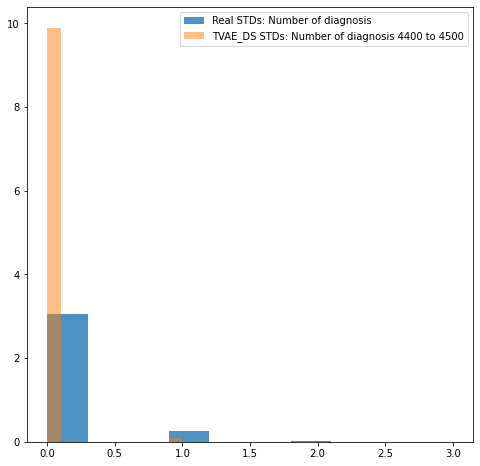

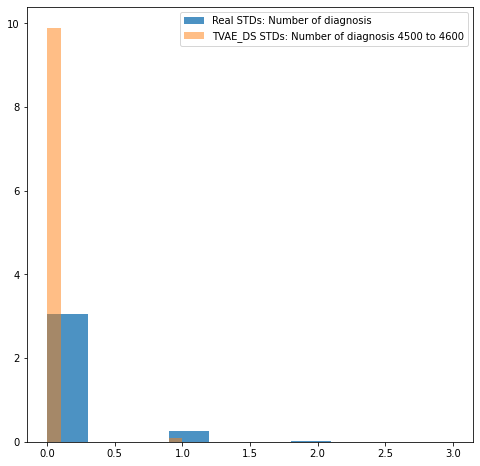

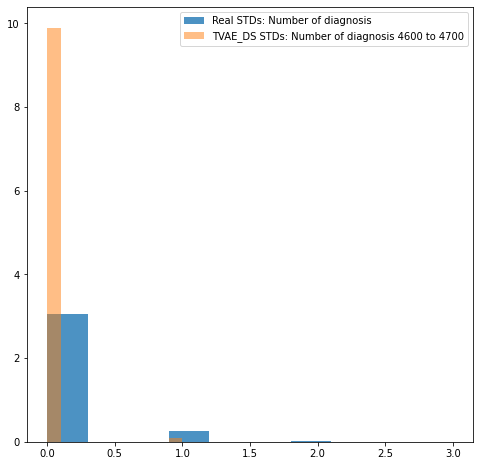

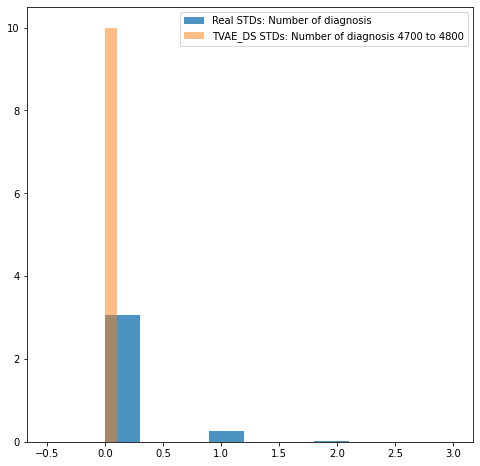

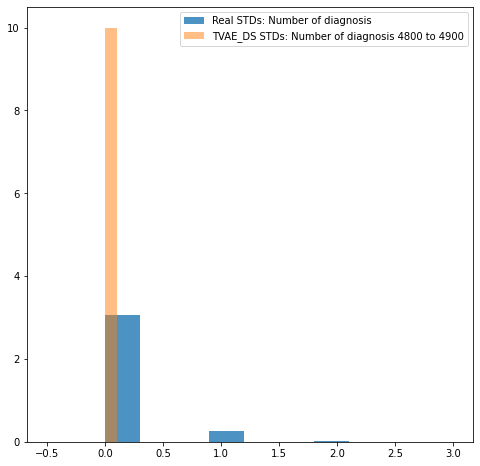

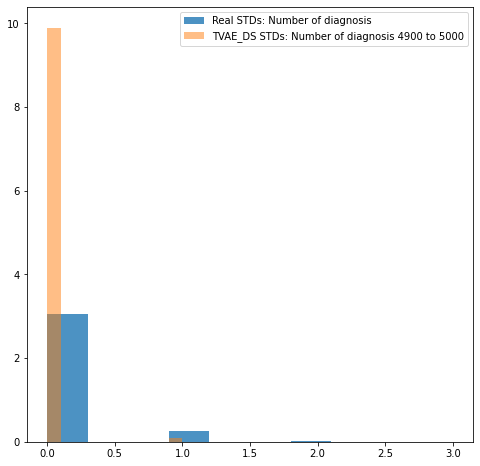

In [31]:
# normalize hists

for i in range(0, len(syn3_age), 100):
    plt.figure(figsize=(8, 8))
    plt.hist(real_age, alpha=0.8, density=True)
    plt.hist(syn3_age[i:i+100], alpha=0.5, density=True)
    plt.legend(labels=('Real STDs: Number of diagnosis', f'TVAE_DS STDs: Number of diagnosis {i} to {i+100}'))
    plt.show()

In [32]:
for i in range(0, len(syn4_age), 100):
    plt.figure(figsize=(8, 8))
    plt.hist(real_age, alpha=0.8, density=True)
    plt.hist(syn4_age[i:i+100], alpha=0.5, density=True)
    plt.legend(labels=('Real Age', f'Syn4 Age {i} to {i+100}'))
    plt.show()

NameError: name 'syn4_age' is not defined

## Dataset Portions T-test

In [ ]:
syn1_age_ttests = []
for i in range(0, len(syn1_age), 100):
    syn1_age_ttests.append(stats.ttest_ind(real_age, syn1_age[i:i+100]))


AR_syn1_age = []
acc = 0
rej = 0
for t_test, crit in syn1_age_ttests:
    if abs(t_test) > crit:
        rej+=1
        AR_syn1_age.append('Reject')
    else:
        acc+=1
        AR_syn1_age.append('Accept')

print(f'Accept {acc} | Reject {rej}')


Accept 24 | Reject 26


In [ ]:
syn2_age_ttests = []

for i in range(0, len(syn2_age), 100):
    syn2_age_ttests.append(stats.ttest_ind(real_age, syn2_age[i:i+100]))

AR_syn2_age = []
acc = 0
rej = 0
for t_test, crit in syn2_age_ttests:
    if abs(t_test) > crit:
        rej+=1
        AR_syn2_age.append('Reject')
    else:
        acc+=1
        AR_syn2_age.append('Accept')

print(f'Accept {acc} | Reject {rej}')

Accept 20 | Reject 30


In [ ]:
syn3_age_ttests = []

for i in range(0, len(syn3_age), 100):
    syn3_age_ttests.append(stats.ttest_ind(real_age, syn3_age[i:i+100]))

AR_syn3_age = []
acc = 0
rej = 0
for t_test, crit in syn3_age_ttests:
    if abs(t_test) > crit:
        rej+=1
        AR_syn3_age.append('Reject')
    else:
        acc+=1
        AR_syn3_age.append('Accept')

print(f'Accept {acc} | Reject {rej}')

Accept 19 | Reject 31


## Dataset Portions KS-test

In [ ]:
syn1_age_kstest = []

for i in range(0, len(syn1_age), 100):
    syn1_age_kstest.append(stats.kstest(real_age, syn1_age[i:i+100]))


AR_syn1_age = []
acc = 0
rej = 0
for ks_test, crit in syn1_age_kstest:
    if ks_test > crit:
        rej+=1
        AR_syn1_age.append('Reject')
    else:
        acc+=1
        AR_syn1_age.append('Accept')

print(f'Accept {acc} | Reject {rej}')

Accept 46 | Reject 4


In [ ]:
syn2_age_kstest = []

for i in range(0, len(syn1_age), 100):
    syn2_age_kstest.append(stats.kstest(real_age, syn2_age[i:i+100]))


AR_syn2_age = []
acc = 0
rej = 0
for ks_test, crit in syn2_age_kstest:
    if ks_test > crit:
        rej+=1
        AR_syn2_age.append('Reject')
    else:
        acc+=1
        AR_syn2_age.append('Accept')
    
print(f'Accept {acc} | Reject {rej}')

Accept 46 | Reject 4


In [ ]:
syn3_age_kstest = []

for i in range(0, len(syn1_age), 100):
    syn3_age_kstest.append(stats.kstest(real_age, syn3_age[i:i+100]))


AR_syn3_age = []
acc = 0
rej = 0
for ks_test, crit in syn3_age_kstest:
    if ks_test > crit:
        rej+=1
        AR_syn3_age.append('Reject')
    else:
        acc+=1
        AR_syn3_age.append('Accept')
    
print(f'Accept {acc} | Reject {rej}')

Accept 32 | Reject 18
